In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import rc
from drawing_statistics_functions import box_plot, bar_plot, bar_plot_inverse
font = {'family': 'DejaVu Sans',
        'size': 16}
rc('font', **font)

In [2]:
folder_name = '/platooned_data/03-12-2020' 
file = open(os.getcwd() + folder_name + '/oscillation_info', 'rb')
oscillation_info = pickle.load(file)
file.close()

#OSCILLATION INFO
#0: minimum speed time stamp
#1: minimum speed
#2 deceleration start
#3 deceleration start speed
#4 acceleration end
#5 acceleration end speed
#6 deceleration end
#7 deceleration end speed
#8 acceleration begin
#9 acceleration begin speed
#10 minimum deceleration rate
#11 maximum acceleration rate
#12 deceleration duration
#13 avg decleration rate
#14 accelereation duration
#15 avg deceleration rate
#16 idle duration

#SCENARIO
#0 headway
#1 engine mode
#2 magnitude
#3 brake pattern
#4 cruise
#5 oscillation_ID
#6 speed level

#Features
oscillation_features = []
for osc in oscillation_info:
    vehs = [osc[i] for i in range(3)]
    scenario = osc[3]
    oscillation_ID = scenario[5]
    
    #Influential factor
    speed_level = scenario[6]
    cruise = scenario[4]
    headway = scenario[0]
    magnitude = scenario[2]
    
    #oscillation growth
    minimum_speed = [veh[1] for veh in vehs]
    amp1 = minimum_speed[1] - minimum_speed[0]
    amp2 = minimum_speed[2] - minimum_speed[0]
    if amp1 < 0 and amp2 < amp1:
        oscillation_pattern = 'amp - amp'
    elif amp1 < 0 and amp2 >= amp1:
        oscillation_pattern = 'amp - damp'
    elif amp1 >= 0 and amp2 < amp1:
        oscillation_pattern = 'damp - amp'
    else:
        oscillation_pattern = 'damp - damp'
    
    #delay
    d_start = [veh[2] for veh in vehs]
    d_start_delay1 = round(max(d_start[1] - d_start[0], 0), 1)
    d_start_delay2 = round(max(d_start[2] - d_start[1], 0), 1)
    d_end = [veh[6] for veh in vehs]
    d_end_delay1 = round(max(d_end[1] - d_end[0], 0), 1)
    d_end_delay2 = round(max(d_end[2] - d_end[1], 0), 1)
    a_start = [veh[8] for veh in vehs]
    a_start_delay1 = round(max(a_start[1] - a_start[0], 0), 1)
    a_start_delay2 = round(max(a_start[2] - a_start[1], 0), 1)
    a_end = [veh[4] for veh in vehs]
    a_end_delay1 = round(max(a_end[1] - a_end[0], 0), 1)
    a_end_delay2 = round(max(a_end[2] - a_end[1], 0), 1)
    delay = ([d_start_delay1, d_end_delay1, a_start_delay1, a_end_delay1], [d_start_delay2, d_end_delay2, a_start_delay2, a_end_delay2])
    
    #acceleration and deceleartion
    d_avg = [veh[13] for veh in vehs]
    d_min = [veh[10] for veh in vehs]
    a_avg = [veh[15] for veh in vehs]
    a_max = [veh[11] for veh in vehs]
    rate_info = (d_avg, d_min, a_avg, a_max)
    
    oscillation_features.append([amp1, amp2, oscillation_ID, speed_level, oscillation_pattern, delay, rate_info, cruise, headway, magnitude])

mid -0.55 low -0.48 p-value 0.6357537971619195
high 0.09 mid -0.55 p-value 2.3992563802656065e-06


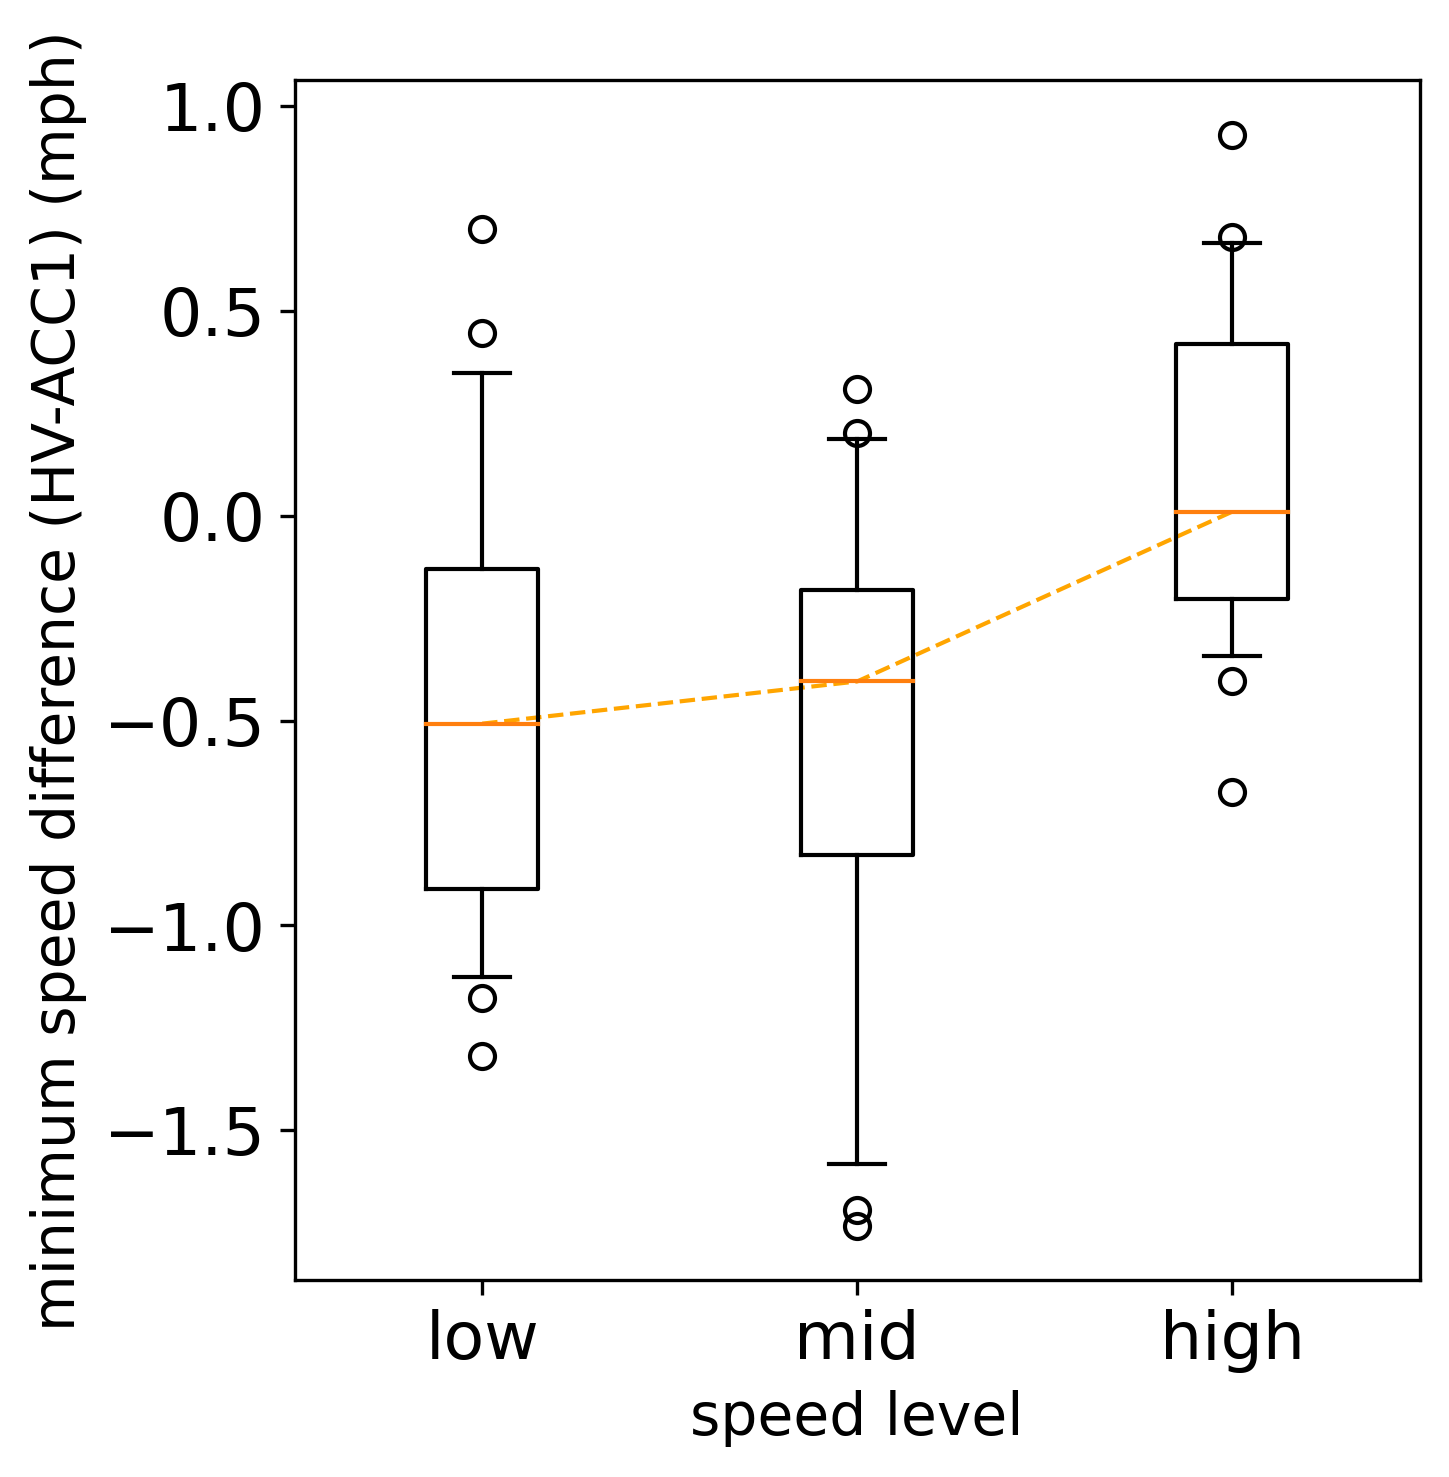

In [3]:
#1.1 oscillation growth - speed level
label_column = 3
y_column = 0
group_label = ['low', 'mid', 'high']
x_label = 'speed level'
y_label = 'minimum speed difference (HV-ACC1) (mph)'
mean_value_info = box_plot(oscillation_features, label_column, y_column, group_label, x_label, y_label)  

long -0.32 no -0.3 p-value 0.8684408469047318


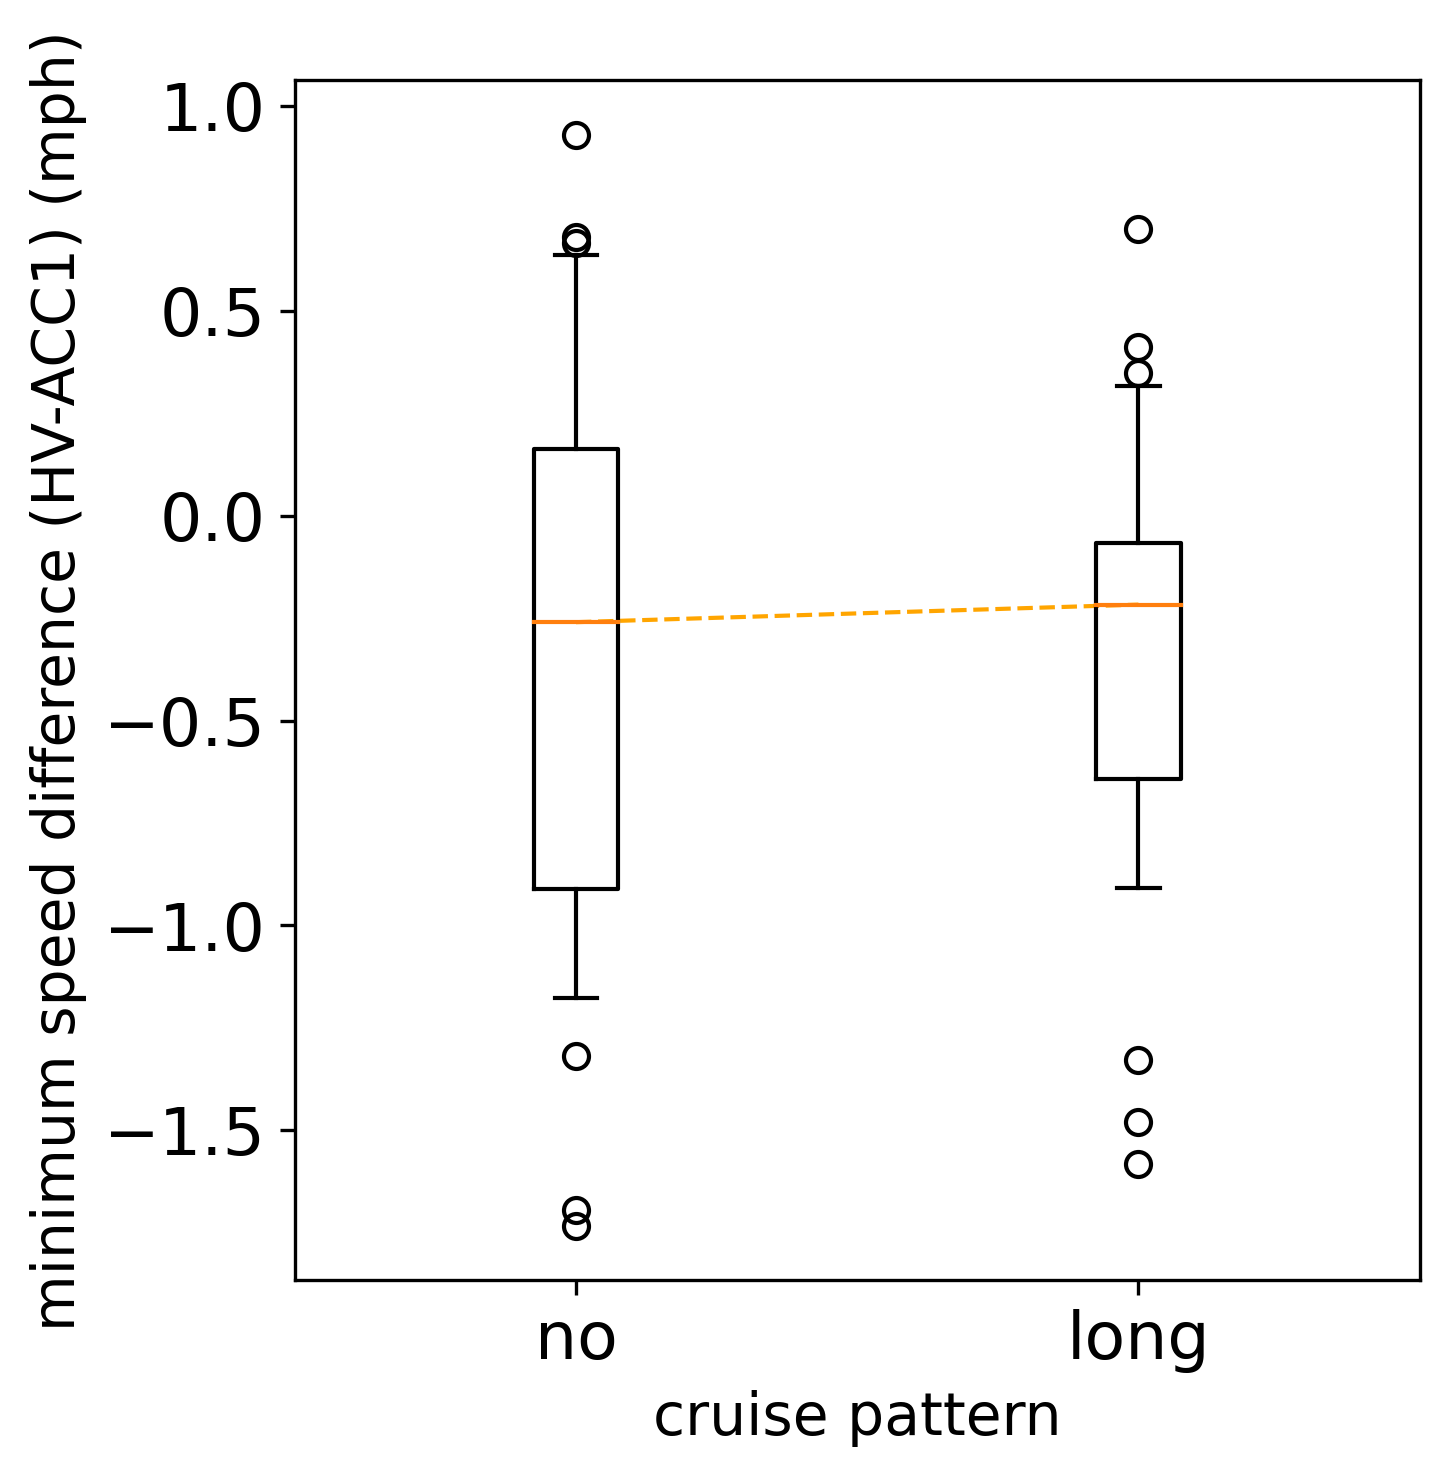

In [4]:
#1.2 oscillation growth - cruise pattern
label_column = 7
y_column = 0
group_label = ['no', 'long']
x_label = 'cruise pattern'
y_label = 'minimum speed difference (HV-ACC1) (mph)'
mean_value_info = box_plot(oscillation_features, label_column, y_column, group_label, x_label, y_label)  

3 -0.06 1 -0.56 p-value 7.12083706949467e-06


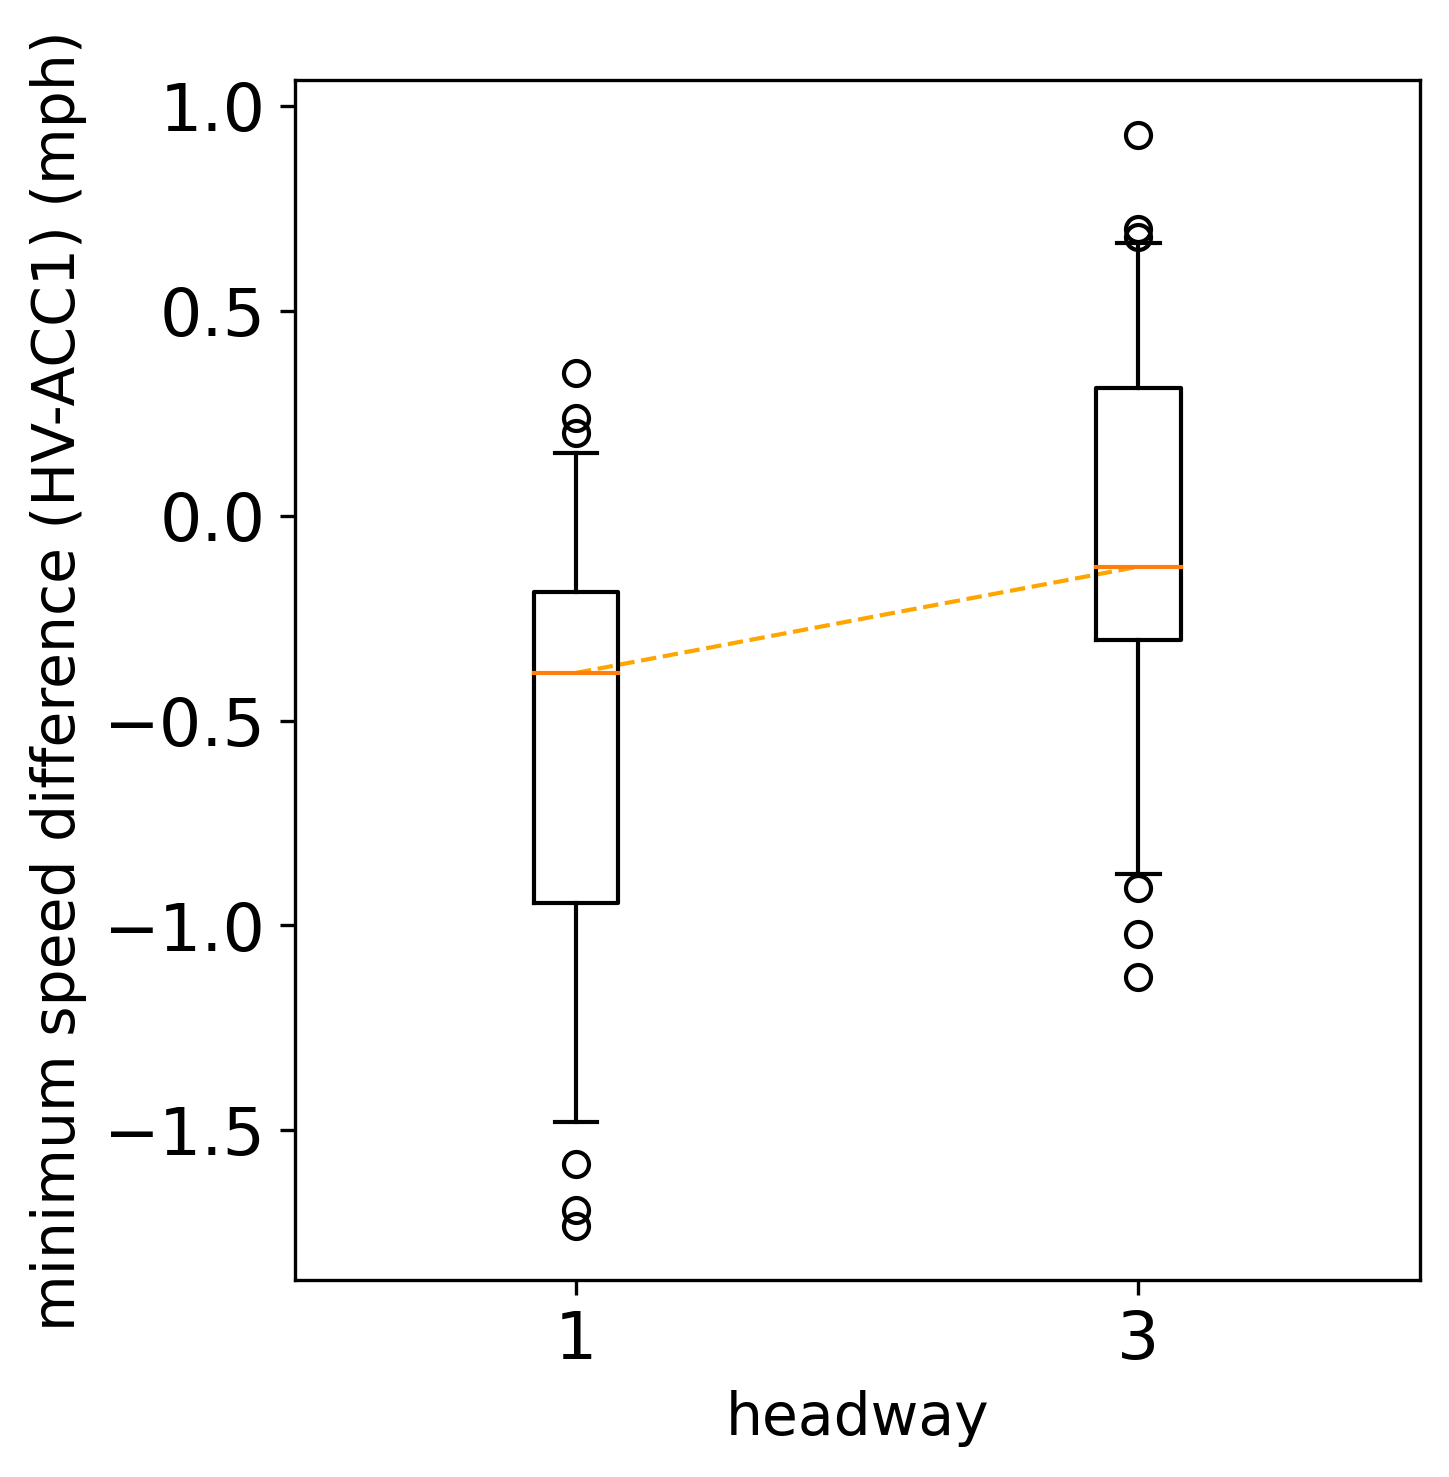

In [5]:
#1.3 oscillation growth - headway
label_column = 8
y_column = 0
group_label = ['1', '3']
x_label = 'headway'
y_label = 'minimum speed difference (HV-ACC1) (mph)'
mean_value_info = box_plot(oscillation_features, label_column, y_column, group_label, x_label, y_label)  

mild -0.13 strong -0.5 p-value 0.0012672704346846568


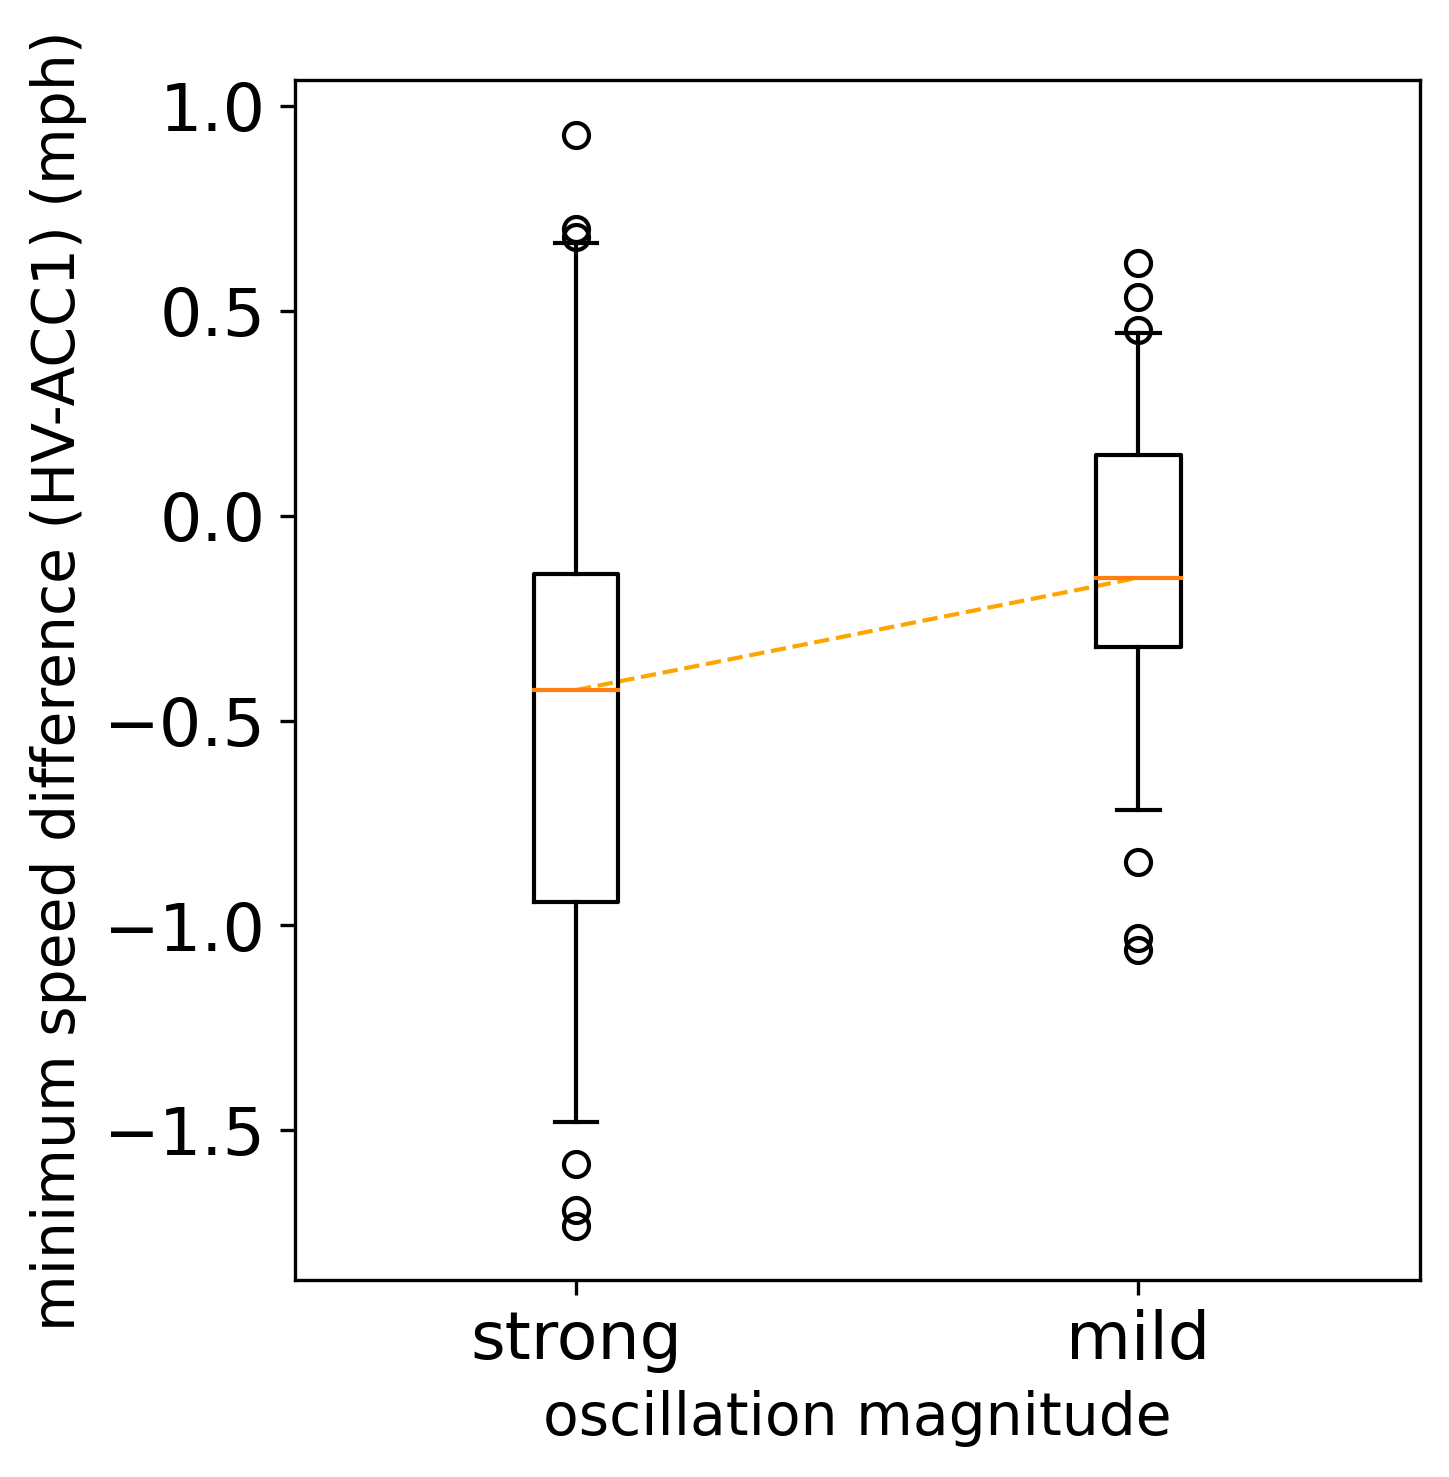

In [6]:
#1.4 oscillation growth - magnitude
label_column = 9
y_column = 0
group_label = ['strong', 'mild']
x_label = 'oscillation magnitude'
y_label = 'minimum speed difference (HV-ACC1) (mph)'
mean_value_info = box_plot(oscillation_features, label_column, y_column, group_label, x_label, y_label)  

mild -0.17 strong -0.67 p-value 4.838927113518826e-05


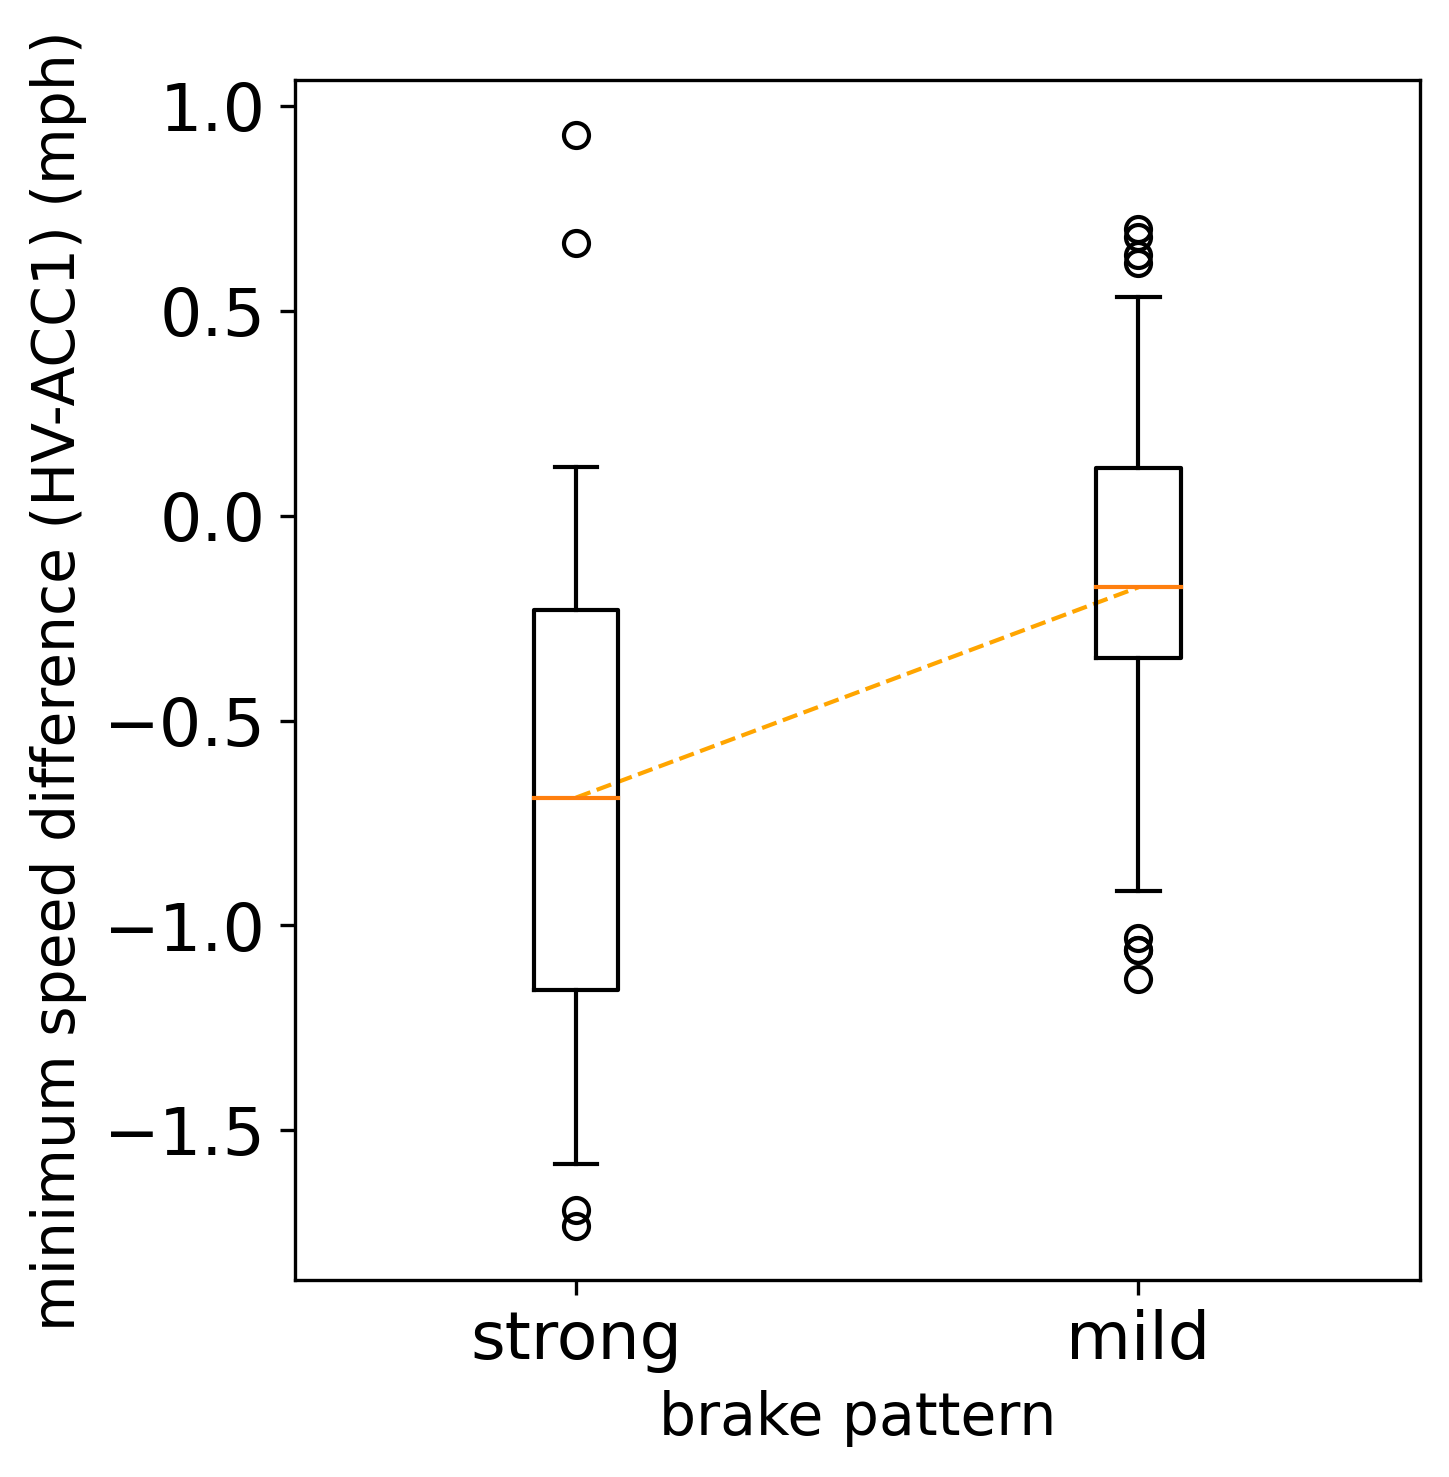

In [7]:
#1.5 oscillation growth - brake pattern
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    if oscillation_features_copy[i][6][1][0] >= 1.2:
        oscillation_features_copy[i].append('strong')
    else:
        oscillation_features_copy[i].append('mild')

label_column = 10
y_column = 0
group_label = ['strong', 'mild']
x_label = 'brake pattern'
y_label = 'minimum speed difference (HV-ACC1) (mph)'
mean_value_info = box_plot(oscillation_features_copy, label_column, y_column, group_label, x_label, y_label)  

Text(0, 0.5, 'frequency')

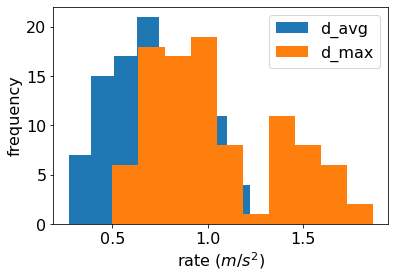

In [8]:
#1.5 - cont.
#d_avg
plt.hist([i[6][0][0] for i in oscillation_features],label='d_avg')
#d_max
plt.hist([i[6][1][0] for i in oscillation_features],label='d_max')
plt.legend()
plt.xlabel('rate ($m$/$s^2$)')
plt.ylabel('frequency')

#use d_max to distinguish strong and mild

Text(0, 0.5, 'frequency')

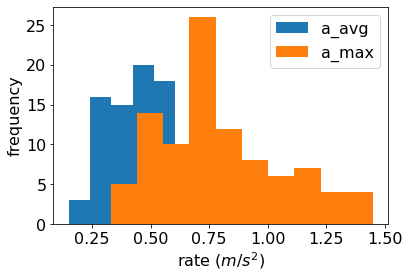

In [9]:
#1.5 - cont.
#a_avg
plt.hist([i[6][2][0] for i in oscillation_features],label='a_avg')
#a_max
plt.hist([i[6][3][0] for i in oscillation_features],label='a_max')
plt.legend()
plt.xlabel('rate ($m$/$s^2$)')
plt.ylabel('frequency')


low Deceleration
end 1.23 Deceleration
start 1.26 p-value 0.886456485836991


low Acceleration
start 1.11 Deceleration
end 1.23 p-value 0.15447555370330737


low Acceleration
end 2.08 Acceleration
start 1.11 p-value 0.10346976539675966


mid Deceleration
end 1.62 Deceleration
start 1.33 p-value 0.003089563664047308


mid Acceleration
start 1.55 Deceleration
end 1.62 p-value 0.27798986193730496


mid Acceleration
end 1.95 Acceleration
start 1.55 p-value 0.11905204970516822


high Deceleration
end 1.82 Deceleration
start 1.69 p-value 0.2950561725866193


high Acceleration
start 1.84 Deceleration
end 1.82 p-value 0.8462962937482813


high Acceleration
end 3.32 Acceleration
start 1.84 p-value 0.0005036353290372099


Deceleration
start mid 1.33 low 1.26 p-value 0.6382971749763292


Deceleration
end mid 1.62 low 1.23 p-value 3.748521019237038e-07


Acceleration
start mid 1.55 low 1.11 p-value 1.238833615870648e-06


Acceleration
end mid 1.95 low 2.08 p-value 0.8360510896484604


Deceleration

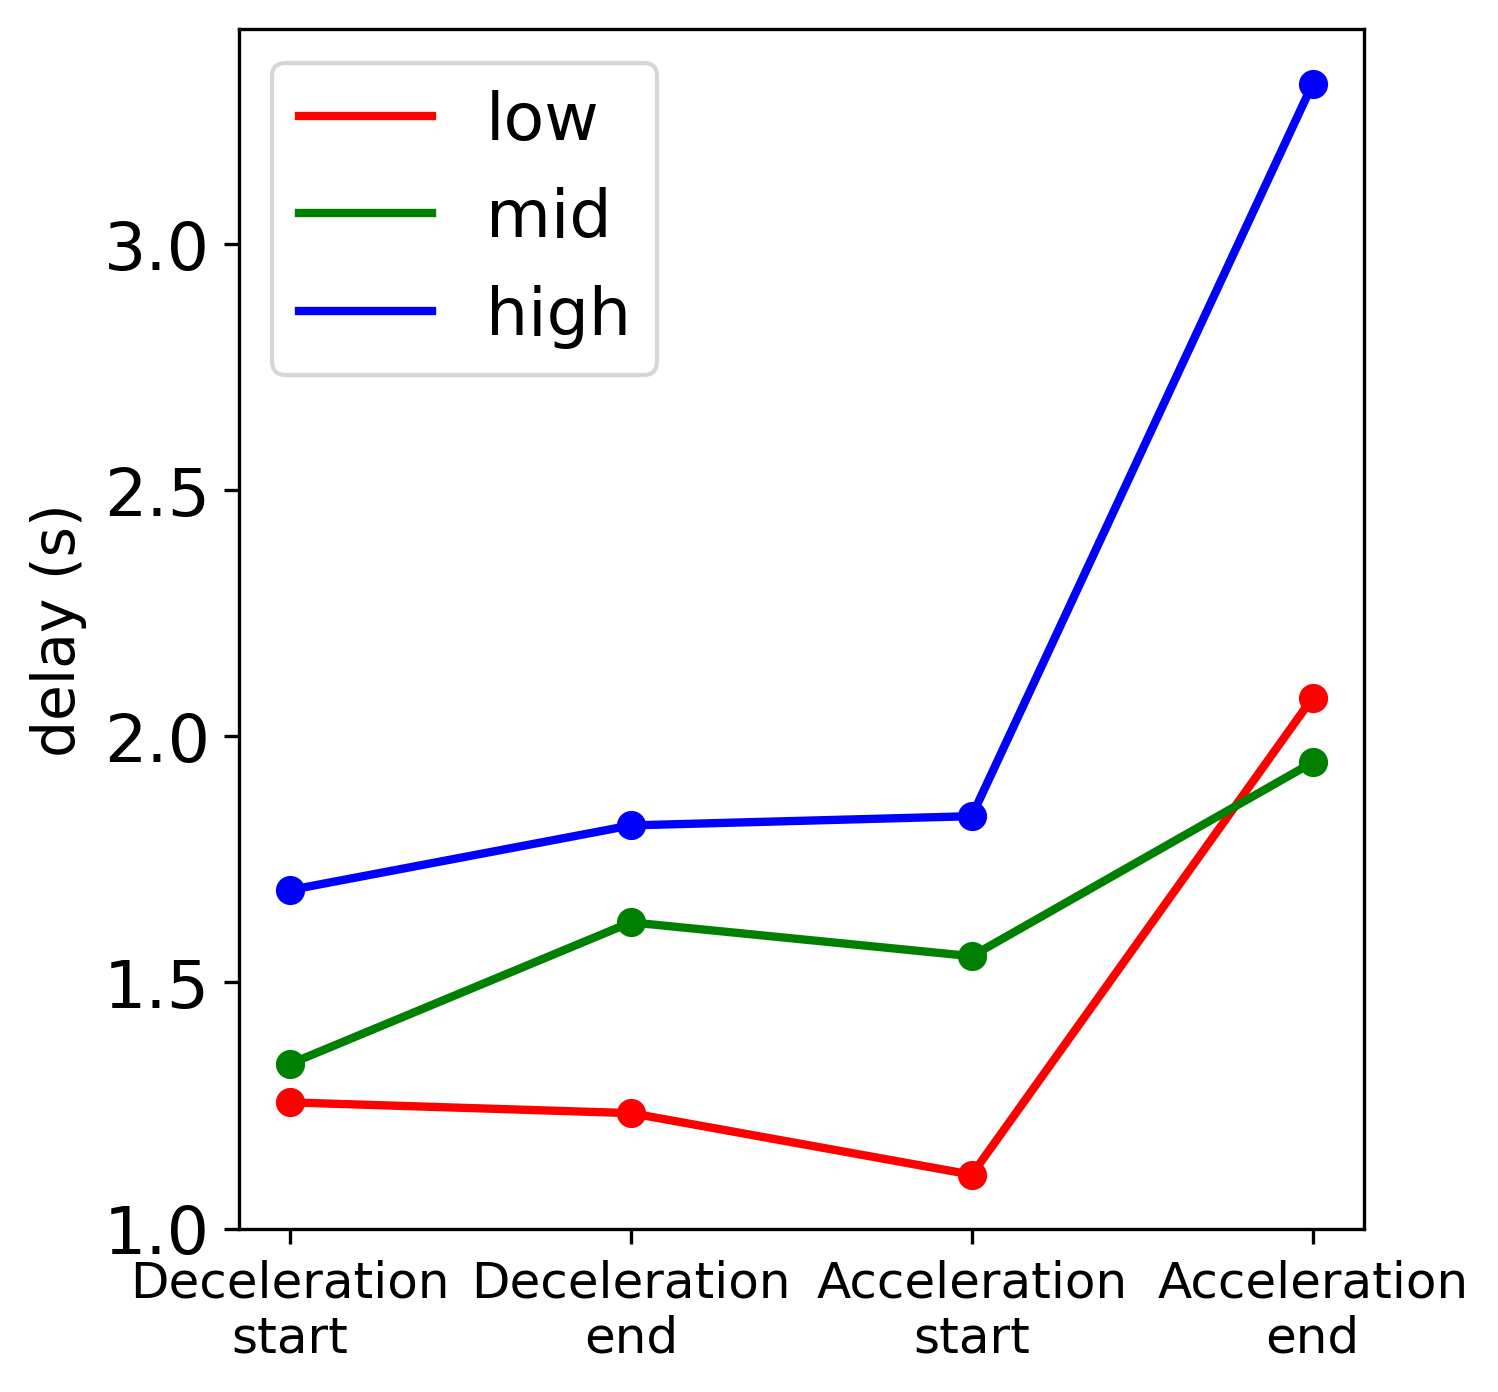

In [10]:
#2.1 delay - speed level
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][5][0]

impact_factor_column = 3
impact_factor_group_label = ['low', 'mid', 'high']
feature_column_group = [11, 12, 13, 14]
feature_column_group_label = ['Deceleration\nstart', 'Deceleration\nend', 'Acceleration\nstart', 'Acceleration\nend']
x_label = ''
y_label = 'delay (s)'

bar_plot(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=False)



no Deceleration
end 1.48 Deceleration
start 1.48 p-value 0.9710235458669723


no Acceleration
start 1.65 Deceleration
end 1.48 p-value 0.01964885007466177


no Acceleration
end 2.68 Acceleration
start 1.65 p-value 0.0027712618338846997


long Deceleration
end 1.63 Deceleration
start 1.37 p-value 0.016692257138633062


long Acceleration
start 1.35 Deceleration
end 1.63 p-value 0.0031831903874247735


long Acceleration
end 2.22 Acceleration
start 1.35 p-value 0.02955489893493863


Deceleration
start long 1.37 no 1.48 p-value 0.4324487736624302


Deceleration
end long 1.63 no 1.48 p-value 0.06276873974492367


Acceleration
start long 1.35 no 1.65 p-value 0.0007640254789439094


Acceleration
end long 2.22 no 2.68 p-value 0.3620624662286628




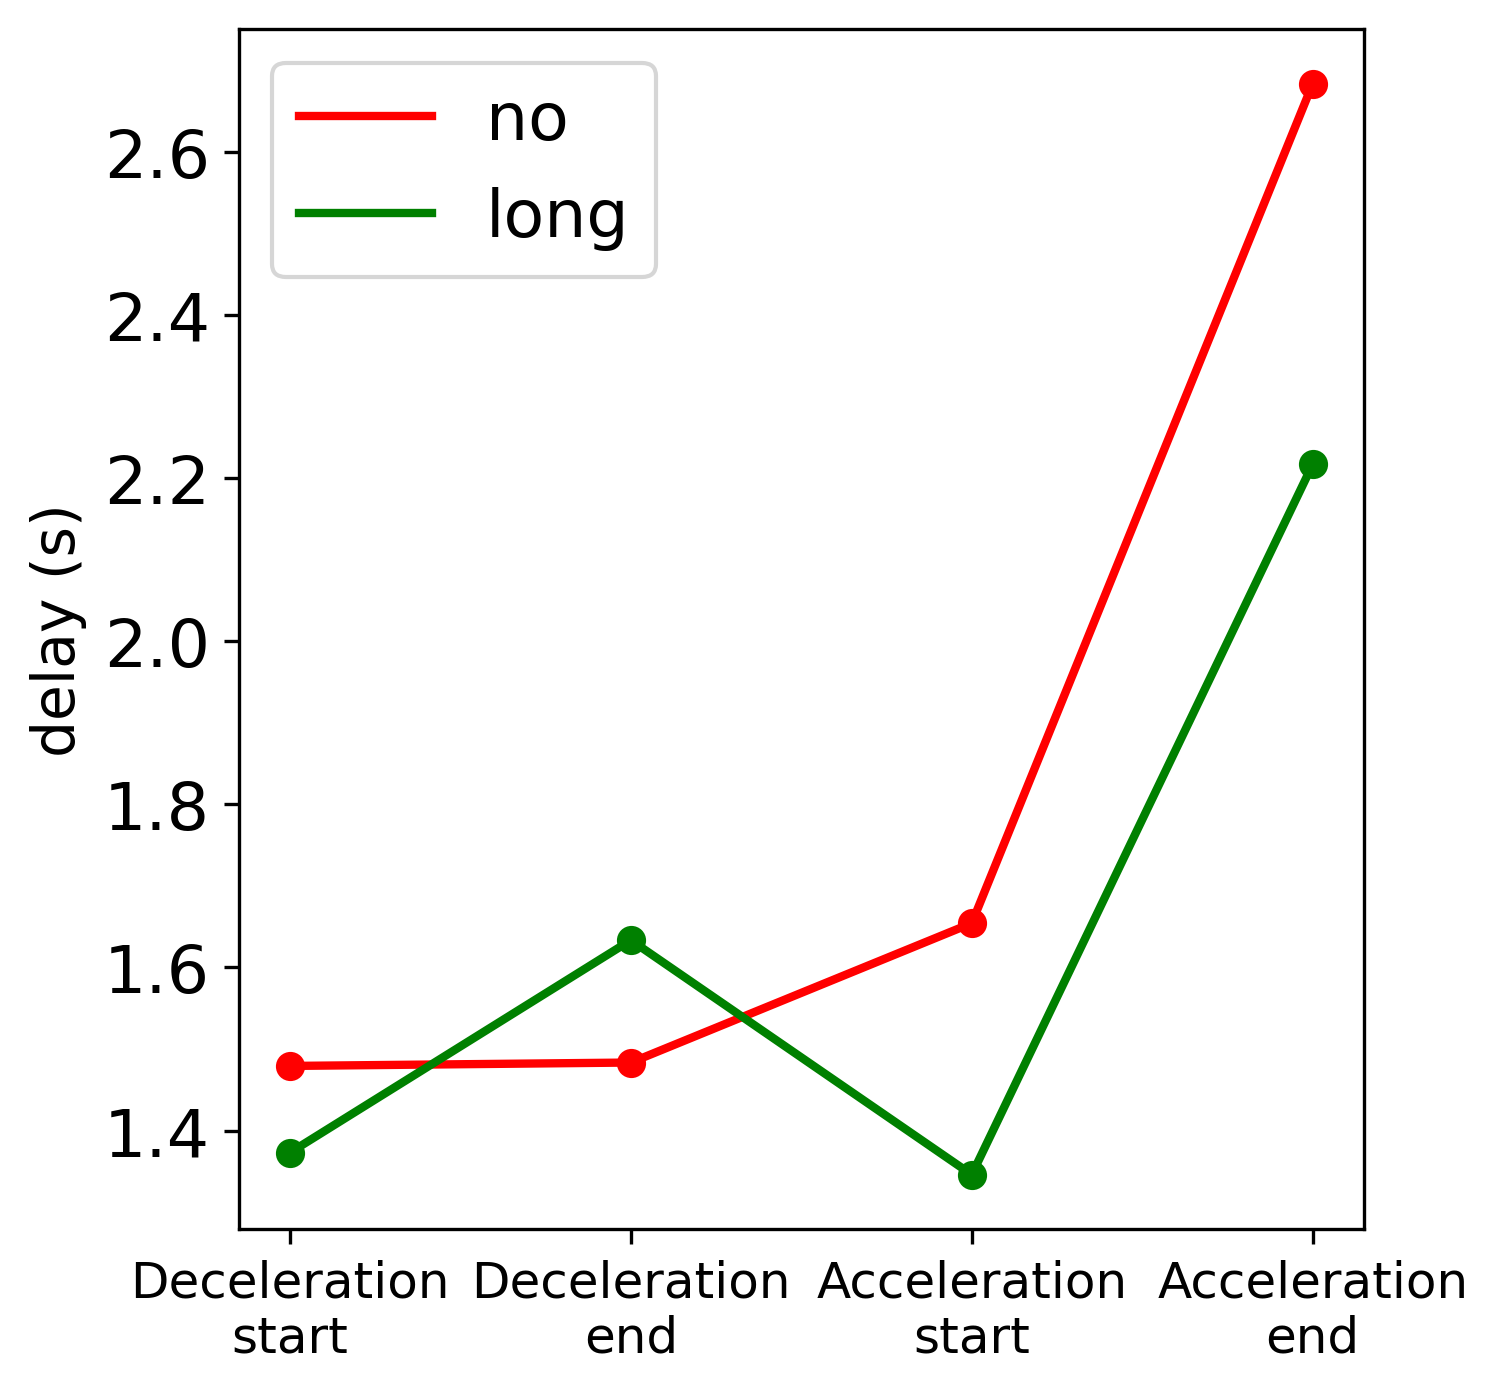

In [11]:
#2.2 delay - cruise pattern
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][5][0]

impact_factor_column = 7
impact_factor_group_label = ['no', 'long']
feature_column_group = [11, 12, 13, 14]
feature_column_group_label = ['Deceleration\nstart', 'Deceleration\nend', 'Acceleration\nstart', 'Acceleration\nend']
x_label = ''
y_label = 'delay (s)'

bar_plot(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=False)

1 Deceleration
end 1.4 Deceleration
start 1.35 p-value 0.6126348215541589


1 Acceleration
start 1.4 Deceleration
end 1.4 p-value 0.9761845696324537


1 Acceleration
end 2.16 Acceleration
start 1.4 p-value 0.010308280406225438


3 Deceleration
end 1.71 Deceleration
start 1.5 p-value 0.05333697798306183


3 Acceleration
start 1.6 Deceleration
end 1.71 p-value 0.23487490042529519


3 Acceleration
end 2.74 Acceleration
start 1.6 p-value 0.00885819138878663


Deceleration
start 3 1.5 1 1.35 p-value 0.2474148278898085


Deceleration
end 3 1.71 1 1.4 p-value 7.845390356225119e-05


Acceleration
start 3 1.6 1 1.4 p-value 0.03582820766492675


Acceleration
end 3 2.74 1 2.16 p-value 0.2505802105043576




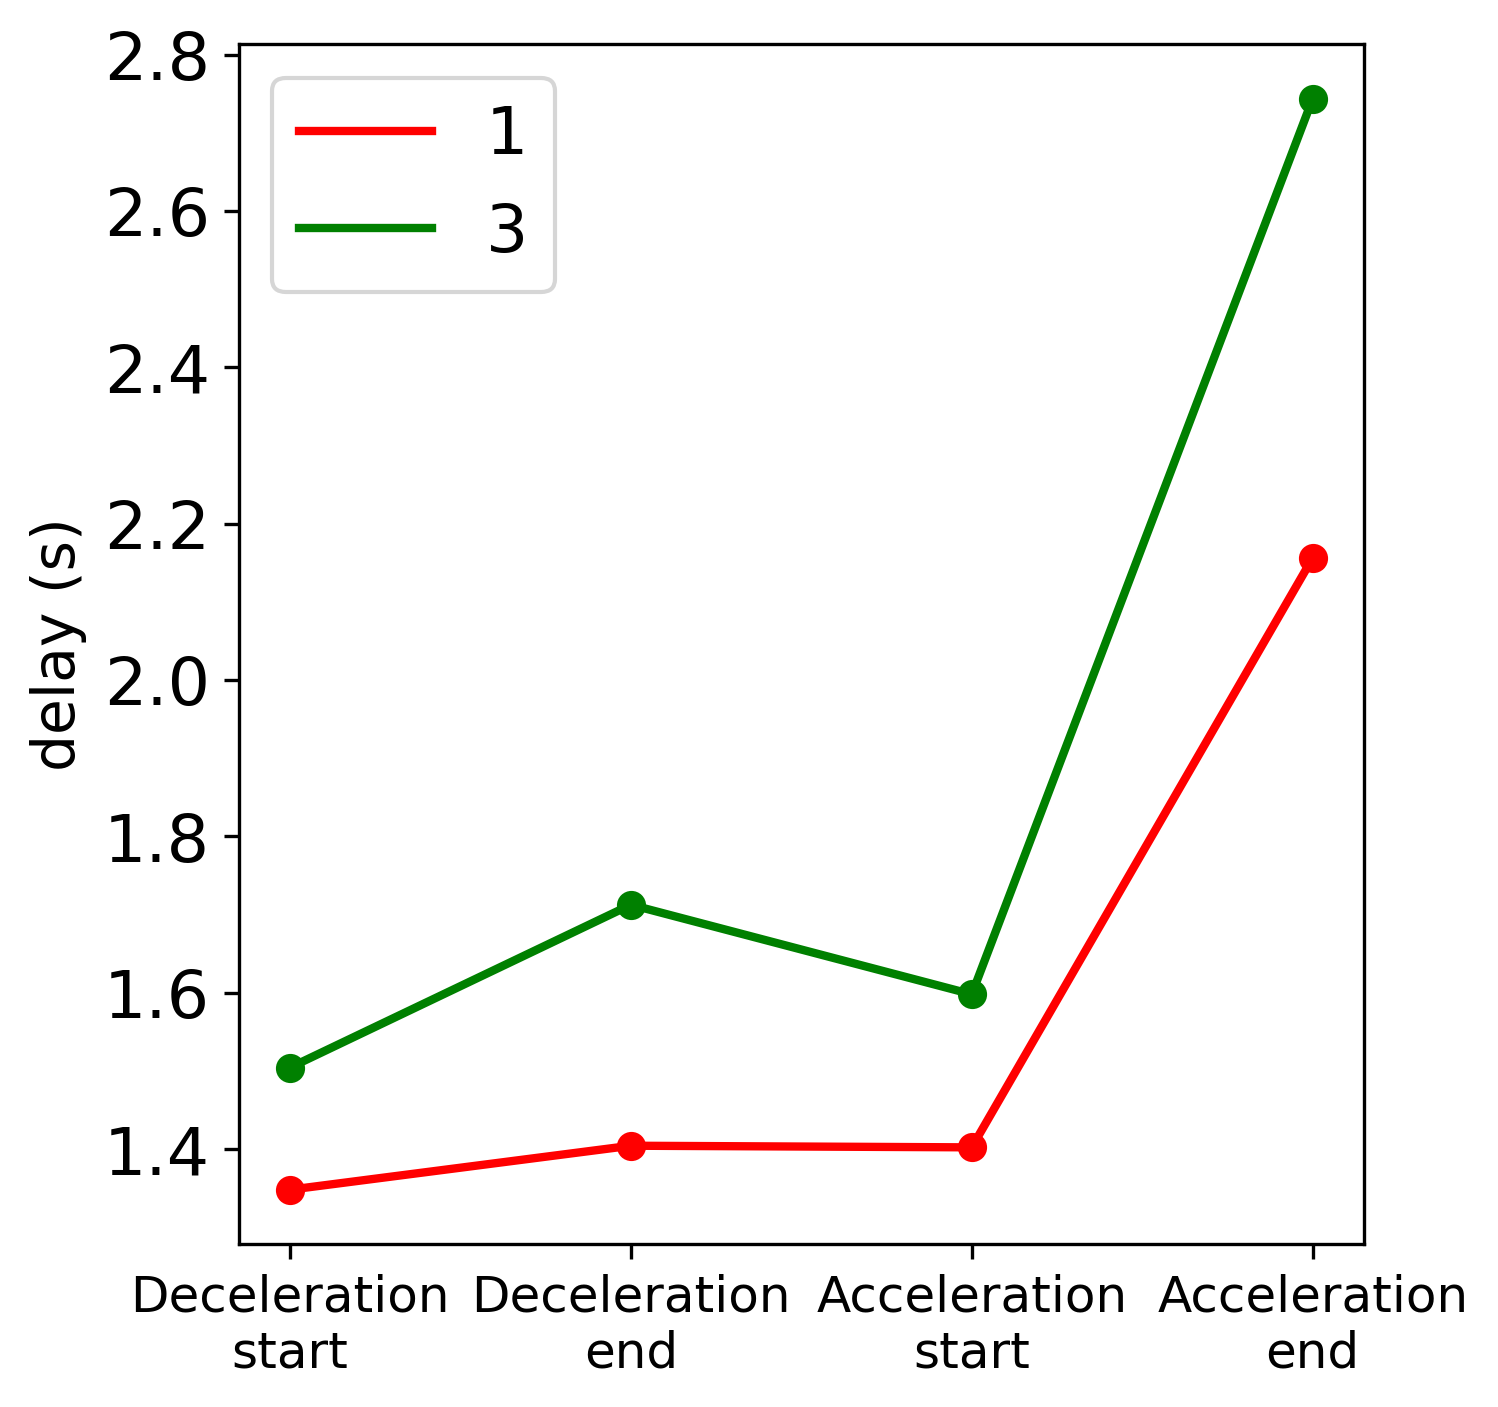

In [12]:
#2.3 delay - headway
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][5][0]

impact_factor_column = 8
impact_factor_group_label = ['1', '3']
feature_column_group = [11, 12, 13, 14]
feature_column_group_label = ['Deceleration\nstart', 'Deceleration\nend', 'Acceleration\nstart', 'Acceleration\nend']
x_label = ''
y_label = 'delay (s)'

bar_plot(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=False)

strong Deceleration
end 1.52 Deceleration
start 1.44 p-value 0.48299265698405947


strong Acceleration
start 1.48 Deceleration
end 1.52 p-value 0.6865054983260654


strong Acceleration
end 2.22 Acceleration
start 1.48 p-value 0.022443188922235898


mild Deceleration
end 1.6 Deceleration
start 1.41 p-value 0.1053516761336453


mild Acceleration
start 1.52 Deceleration
end 1.6 p-value 0.37072913611676683


mild Acceleration
end 2.68 Acceleration
start 1.52 p-value 0.005514695050351975


Deceleration
start mild 1.41 strong 1.44 p-value 0.817674278029302


Deceleration
end mild 1.6 strong 1.52 p-value 0.30433584911730666


Acceleration
start mild 1.52 strong 1.48 p-value 0.7239369484407431


Acceleration
end mild 2.68 strong 2.22 p-value 0.3620624662286632




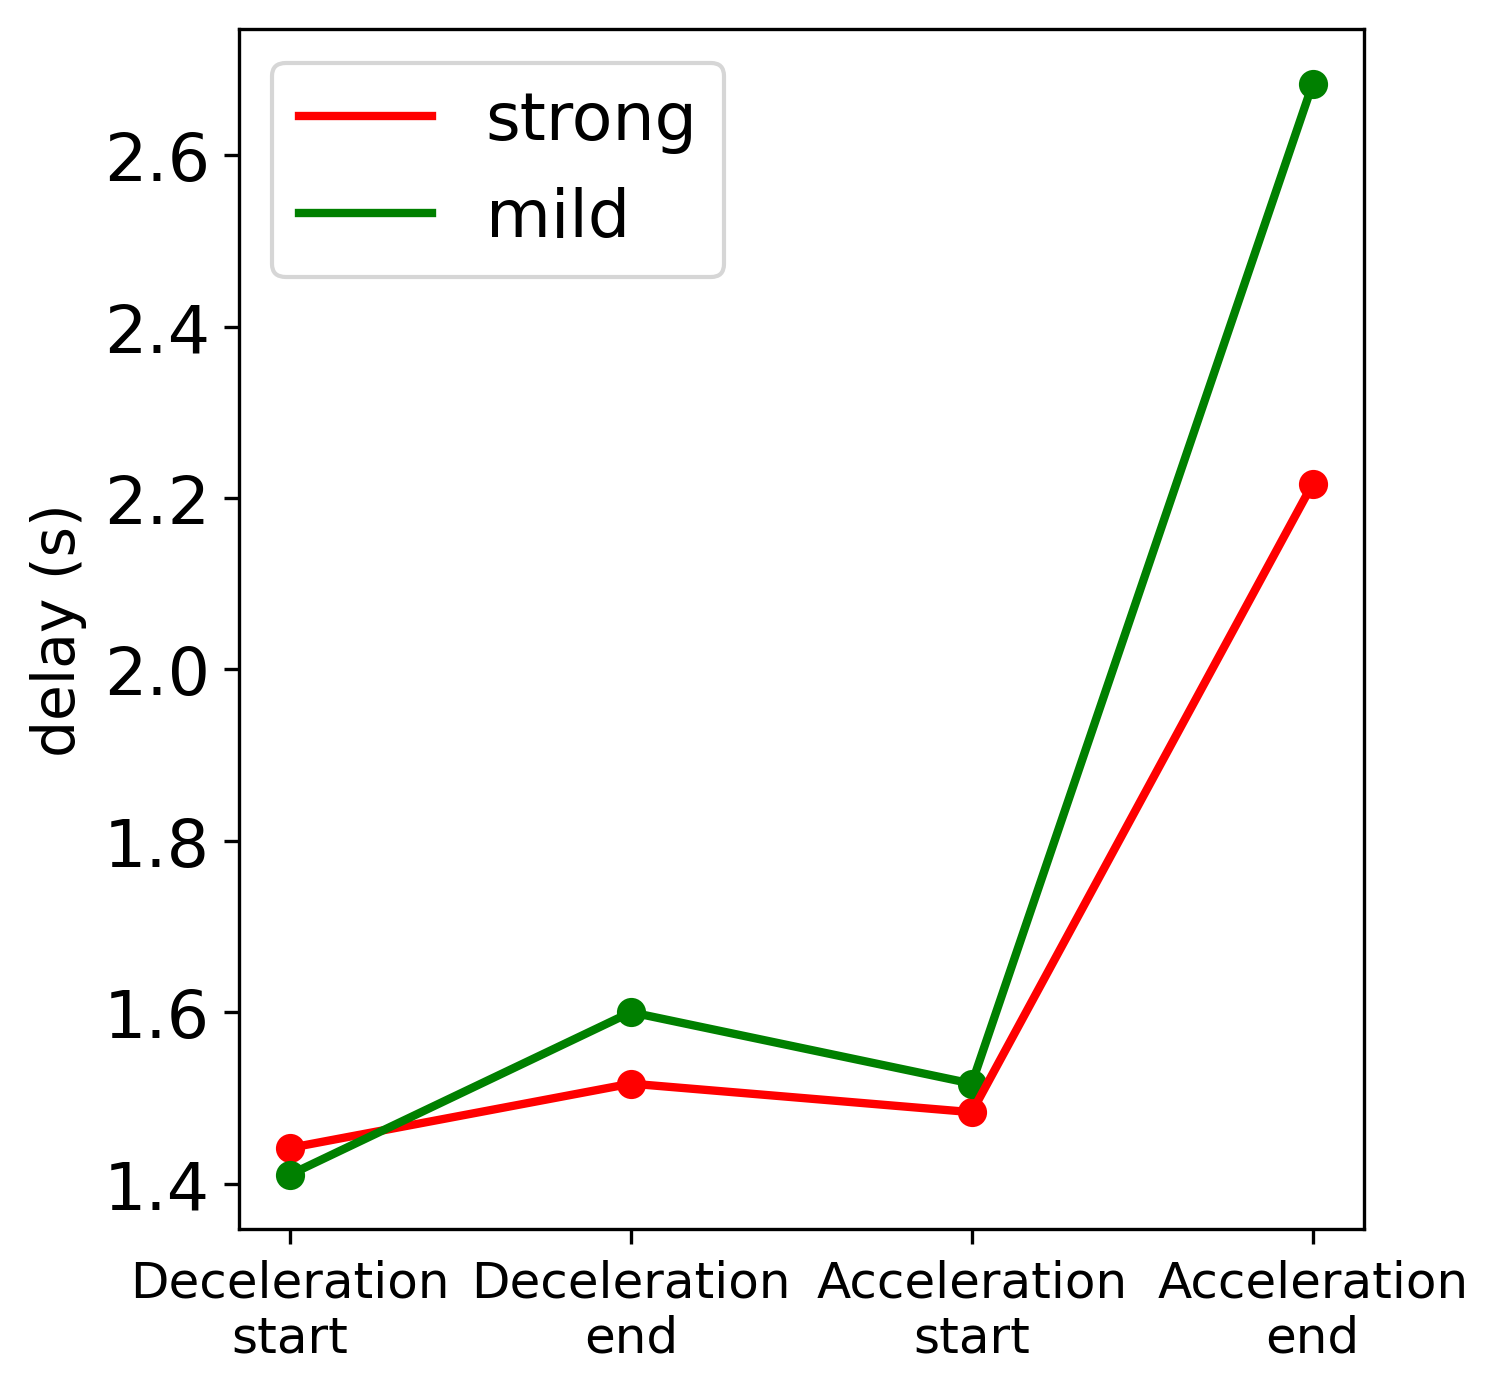

In [13]:
#2.4 delay - magnitude
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][5][0]

impact_factor_column = 9
impact_factor_group_label = ['strong', 'mild']
feature_column_group = [11, 12, 13, 14]
feature_column_group_label = ['Deceleration\nstart', 'Deceleration\nend', 'Acceleration\nstart', 'Acceleration\nend']
x_label = ''
y_label = 'delay (s)'

bar_plot(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=False)

strong Deceleration
end 1.6 Deceleration
start 1.26 p-value 0.007847598848466086


strong Acceleration
start 1.5 Deceleration
end 1.6 p-value 0.3446989232857469


strong Acceleration
end 2.83 Acceleration
start 1.5 p-value 0.005552596045567272


mild Deceleration
end 1.54 Deceleration
start 1.5 p-value 0.6504453116959978


mild Acceleration
start 1.5 Deceleration
end 1.54 p-value 0.5898259193397493


mild Acceleration
end 2.29 Acceleration
start 1.5 p-value 0.012152989983151794


Deceleration
start mild 1.5 strong 1.26 p-value 0.10740579412875931


Deceleration
end mild 1.54 strong 1.6 p-value 0.47486476242767894


Acceleration
start mild 1.5 strong 1.5 p-value 0.9612770652510785


Acceleration
end mild 2.29 strong 2.83 p-value 0.34257641429642627




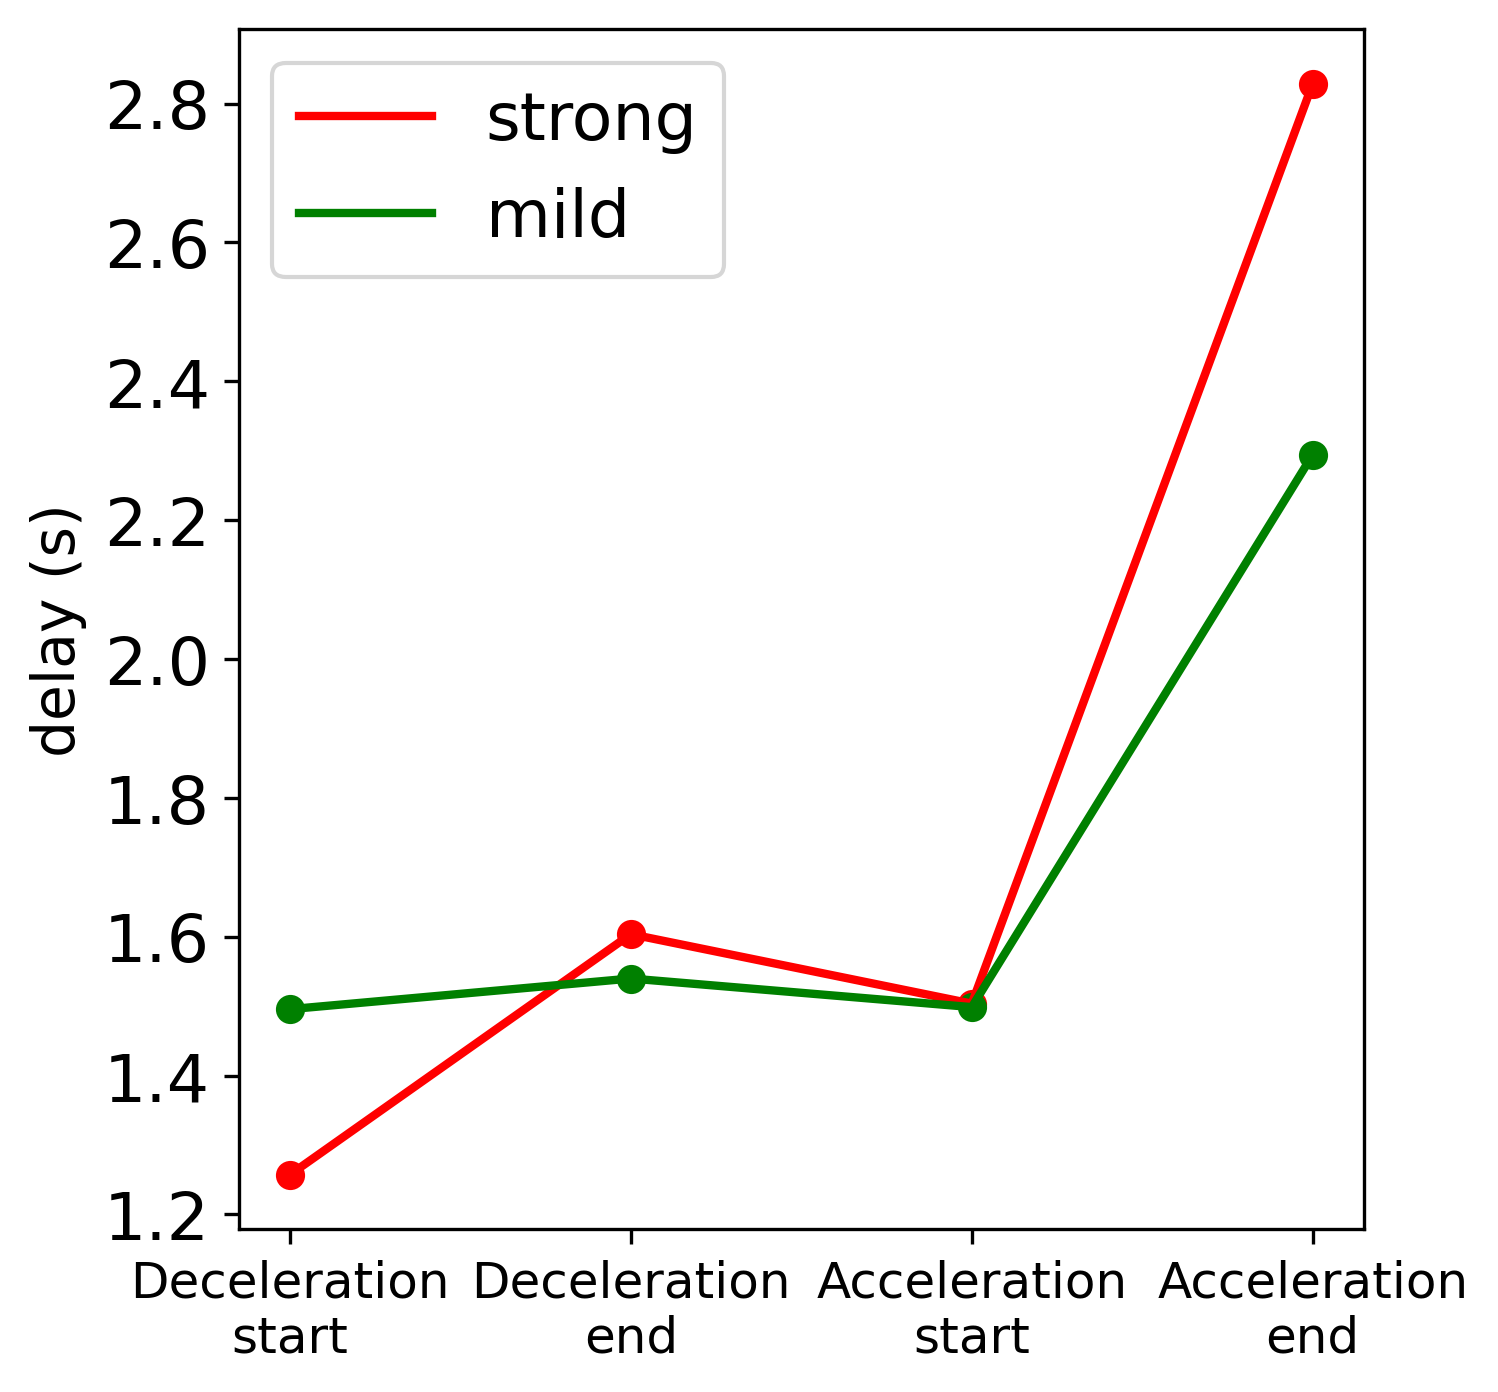

In [14]:
#2.5 delay - brake pattern
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][5][0]

impact_factor_column = 10
impact_factor_group_label = ['strong', 'mild']
feature_column_group = [11, 12, 13, 14]
feature_column_group_label = ['Deceleration\nstart', 'Deceleration\nend', 'Acceleration\nstart', 'Acceleration\nend']
x_label = ''
y_label = 'delay (s)'

bar_plot(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=False)

HV mid 1.09 low 1.08 p-value 0.8817859454189708


HV high 0.97 mid 1.09 p-value 0.1413954814244765


ACC1 mid 1.14 low 1.21 p-value 0.4653488552098518


ACC1 high 0.92 mid 1.14 p-value 0.02111657689108553


low ACC1 1.21 HV 1.08 p-value 0.1411624214027784


mid ACC1 1.14 HV 1.09 p-value 0.6211364338441093


high ACC1 0.92 HV 0.97 p-value 0.5953449630510312




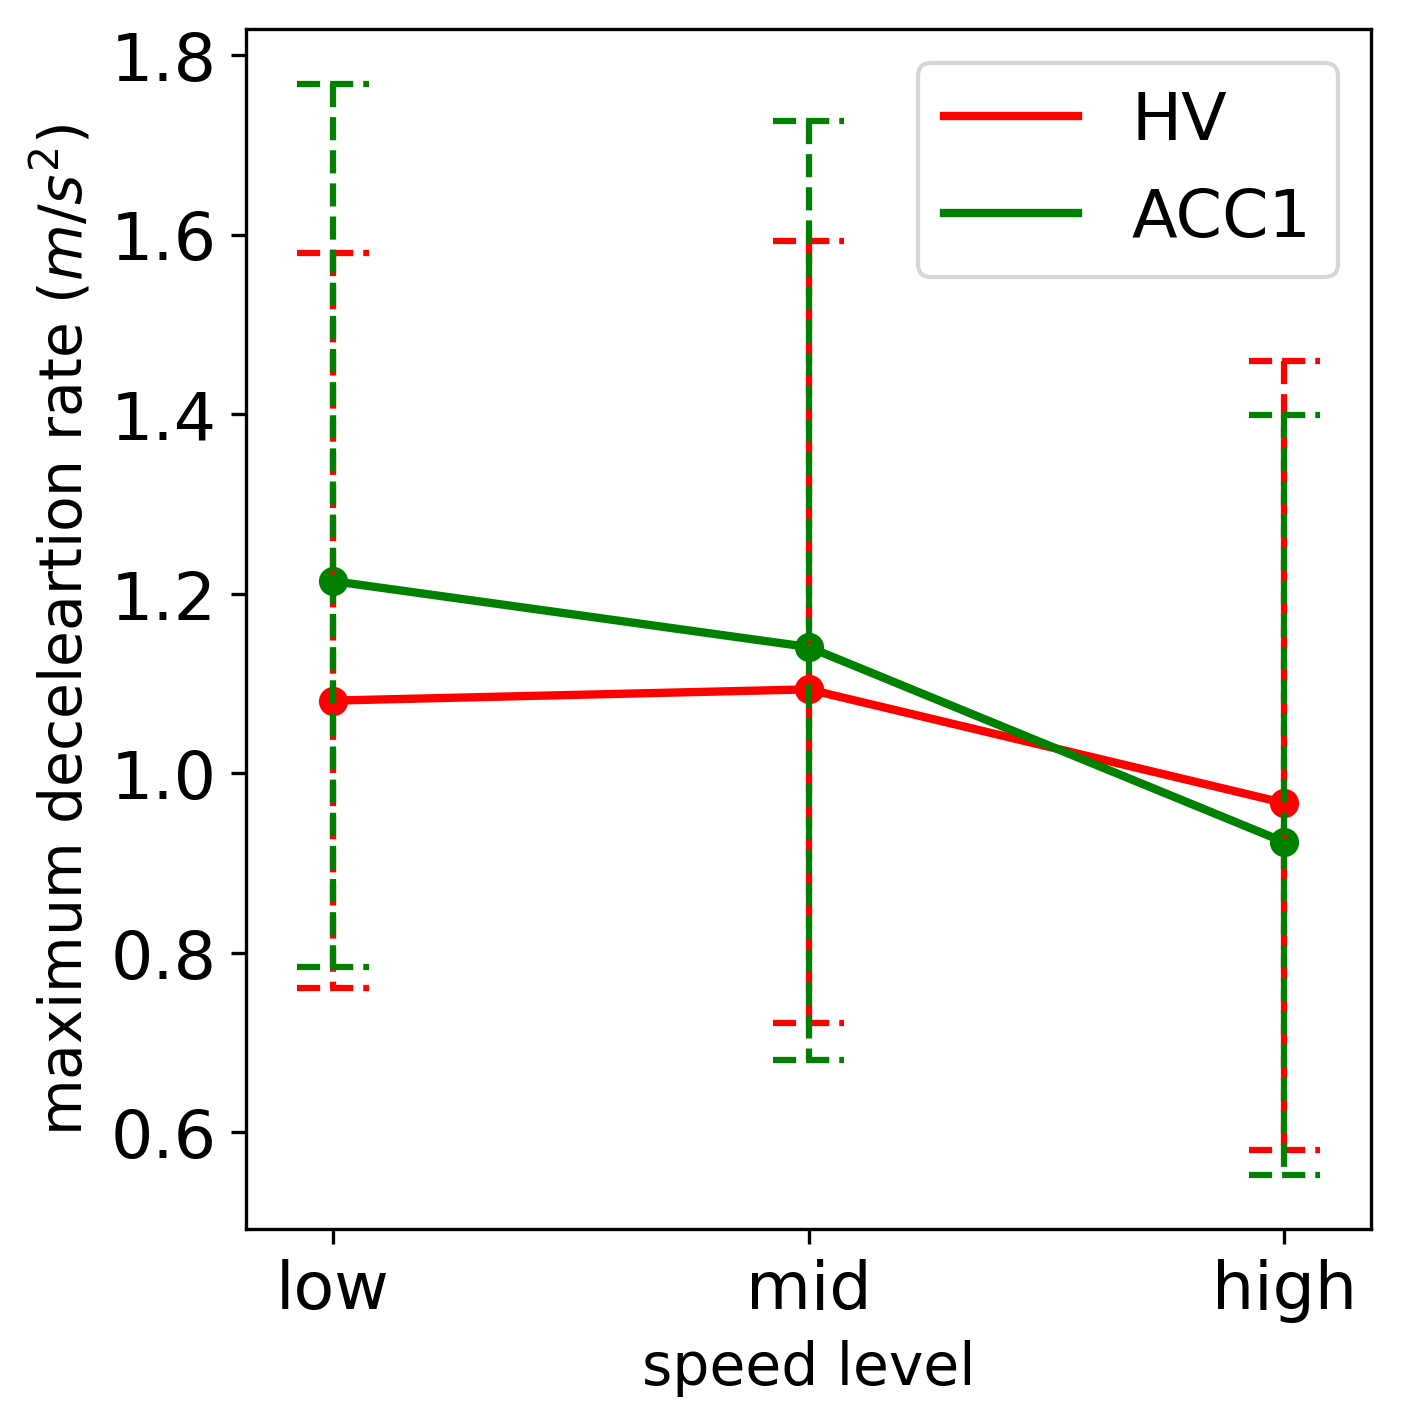

HV mid 0.84 low 0.82 p-value 0.7537874583480926


HV high 0.73 mid 0.84 p-value 0.09094627798187296


ACC1 mid 0.86 low 0.8 p-value 0.21079871168488884


ACC1 high 0.69 mid 0.86 p-value 0.0003634291941892964


low ACC1 0.8 HV 0.82 p-value 0.7683609086191179


mid ACC1 0.86 HV 0.84 p-value 0.6406577102647874


high ACC1 0.69 HV 0.73 p-value 0.5356527429562874




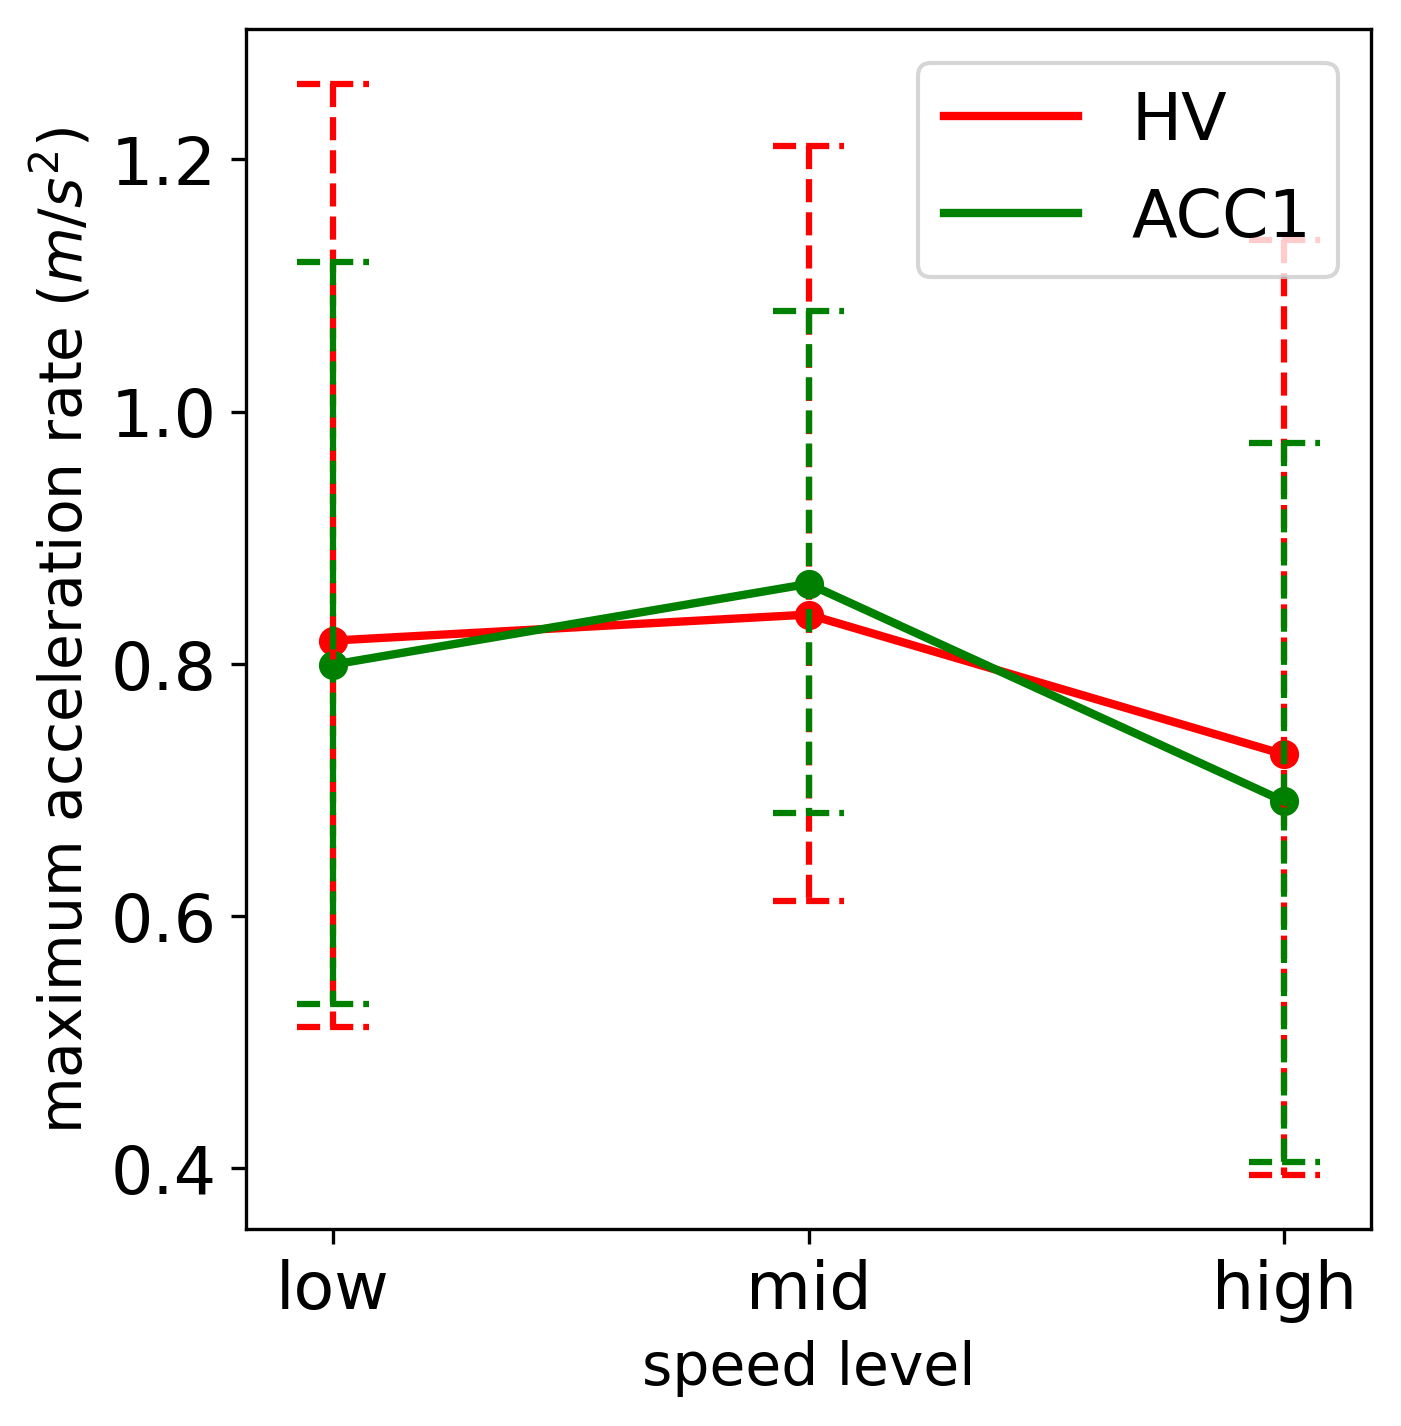

HV mid 0.74 low 0.72 p-value 0.7250154756033105


HV high 0.65 mid 0.74 p-value 0.12316044357070759


ACC1 mid 0.75 low 0.8 p-value 0.41456118011005283


ACC1 high 0.6 mid 0.75 p-value 0.012139767575661879


low ACC1 0.8 HV 0.72 p-value 0.20001775072421485


mid ACC1 0.75 HV 0.74 p-value 0.9249035674003686


high ACC1 0.6 HV 0.65 p-value 0.30983790162716485




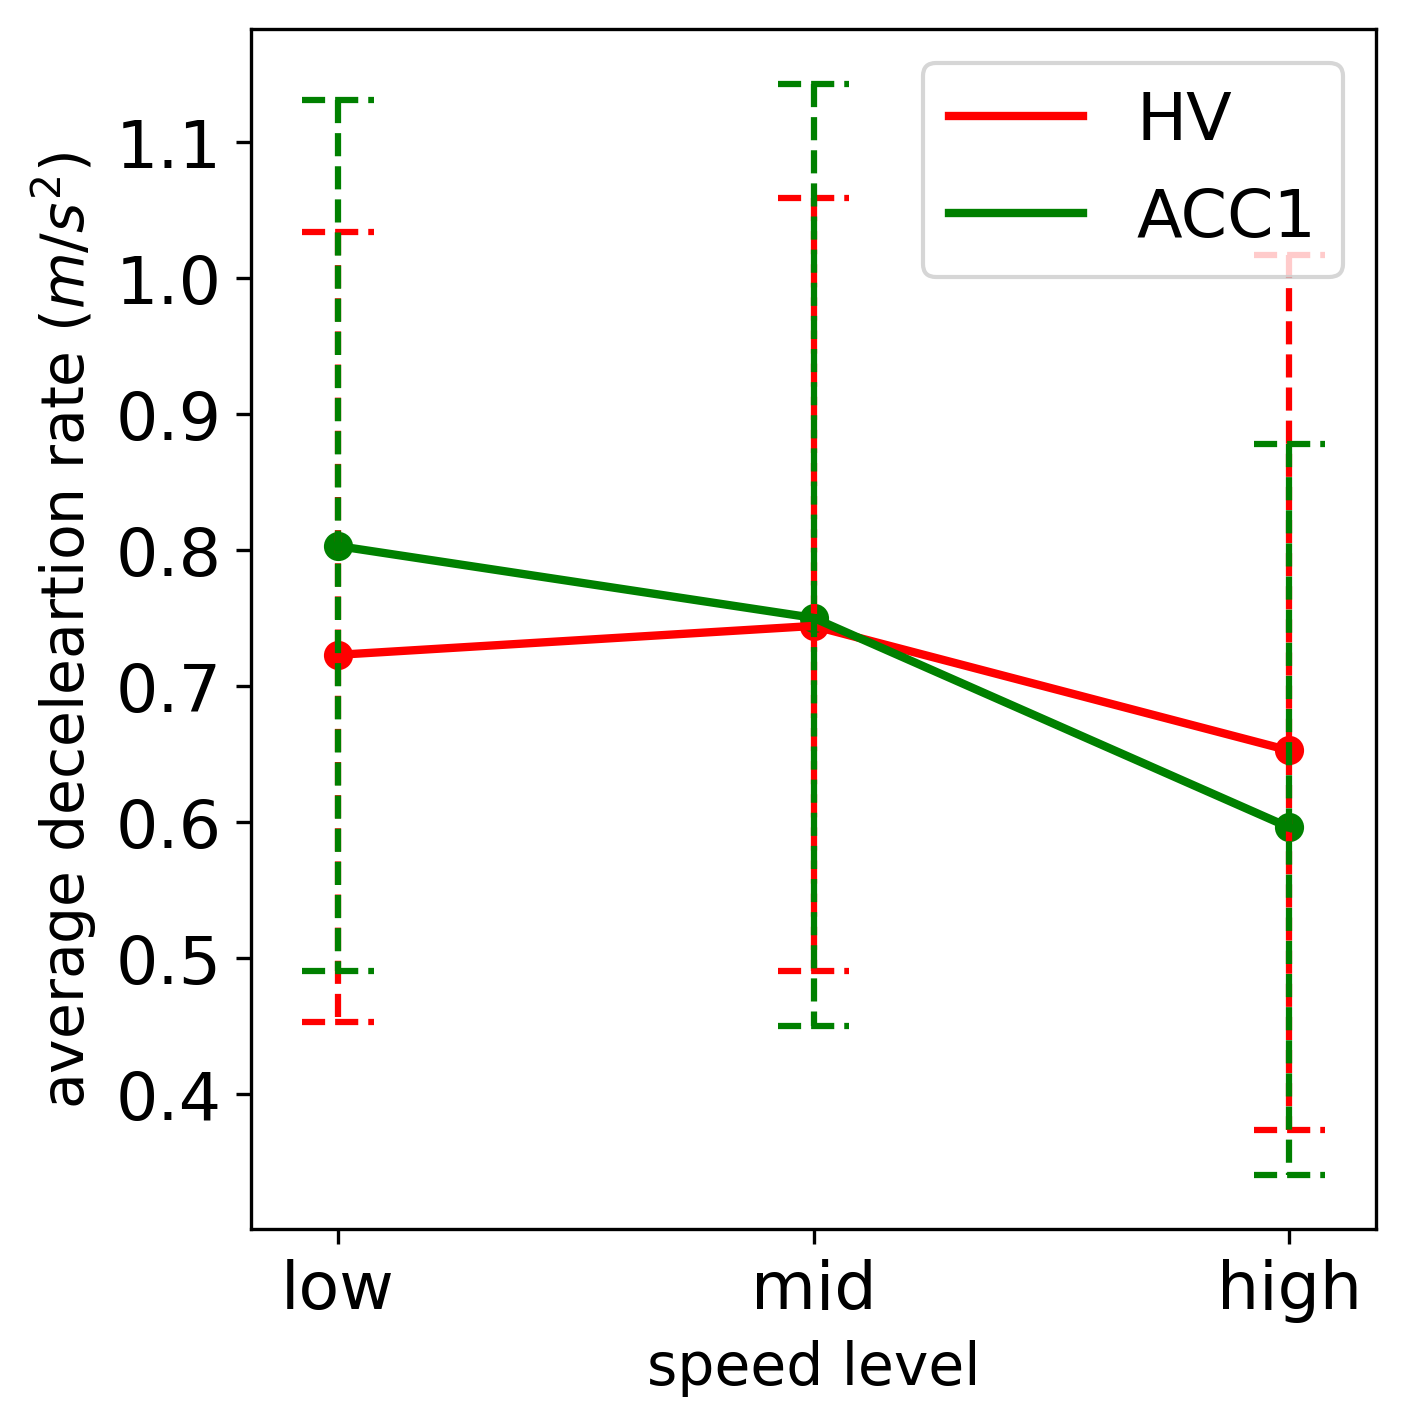

HV mid 0.53 low 0.53 p-value 0.9697964678843776


HV high 0.46 mid 0.53 p-value 0.1316763728478398


ACC1 mid 0.53 low 0.52 p-value 0.8898110433981201


ACC1 high 0.36 mid 0.53 p-value 4.929073230038328e-06


low ACC1 0.52 HV 0.53 p-value 0.8922525008213016


mid ACC1 0.53 HV 0.53 p-value 0.9464520656742137


high ACC1 0.36 HV 0.46 p-value 0.007195634064732268




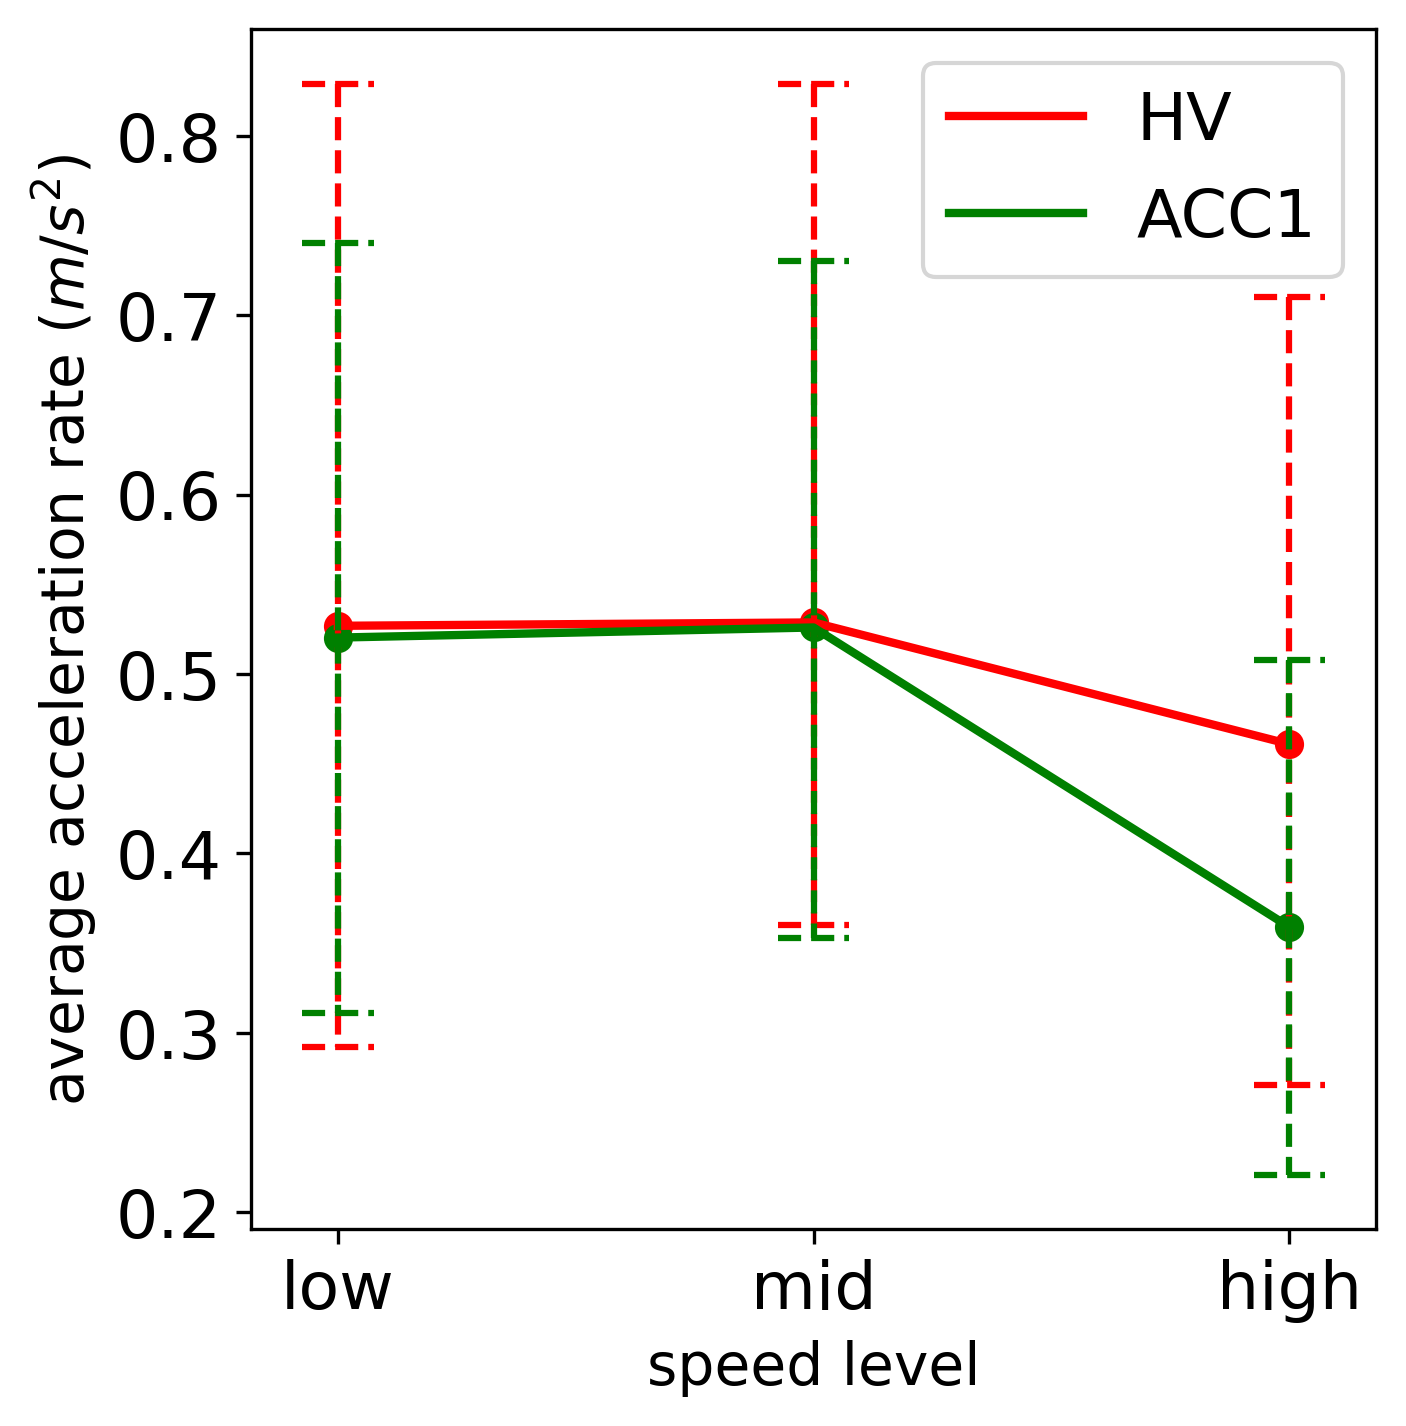

In [16]:
#3.1 deceleration & acceleration rate - speed level
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][6][0][:2]\
                                    + oscillation_features_copy[i][6][2][:2] \
                                    + oscillation_features_copy[i][6][1][:2] \
                                    + oscillation_features_copy[i][6][3][:2]

impact_factor_column = 3
impact_factor_group_label = ['low', 'mid', 'high']
x_label = 'speed level'

feature_column_group = [15, 16]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [17, 18]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [11, 12]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [13, 14]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

HV long 1.03 no 1.06 p-value 0.6170406425848827


ACC1 long 1.08 no 1.11 p-value 0.677796716747302


no ACC1 1.11 HV 1.06 p-value 0.5538901238913995


long ACC1 1.08 HV 1.03 p-value 0.5310193870572404




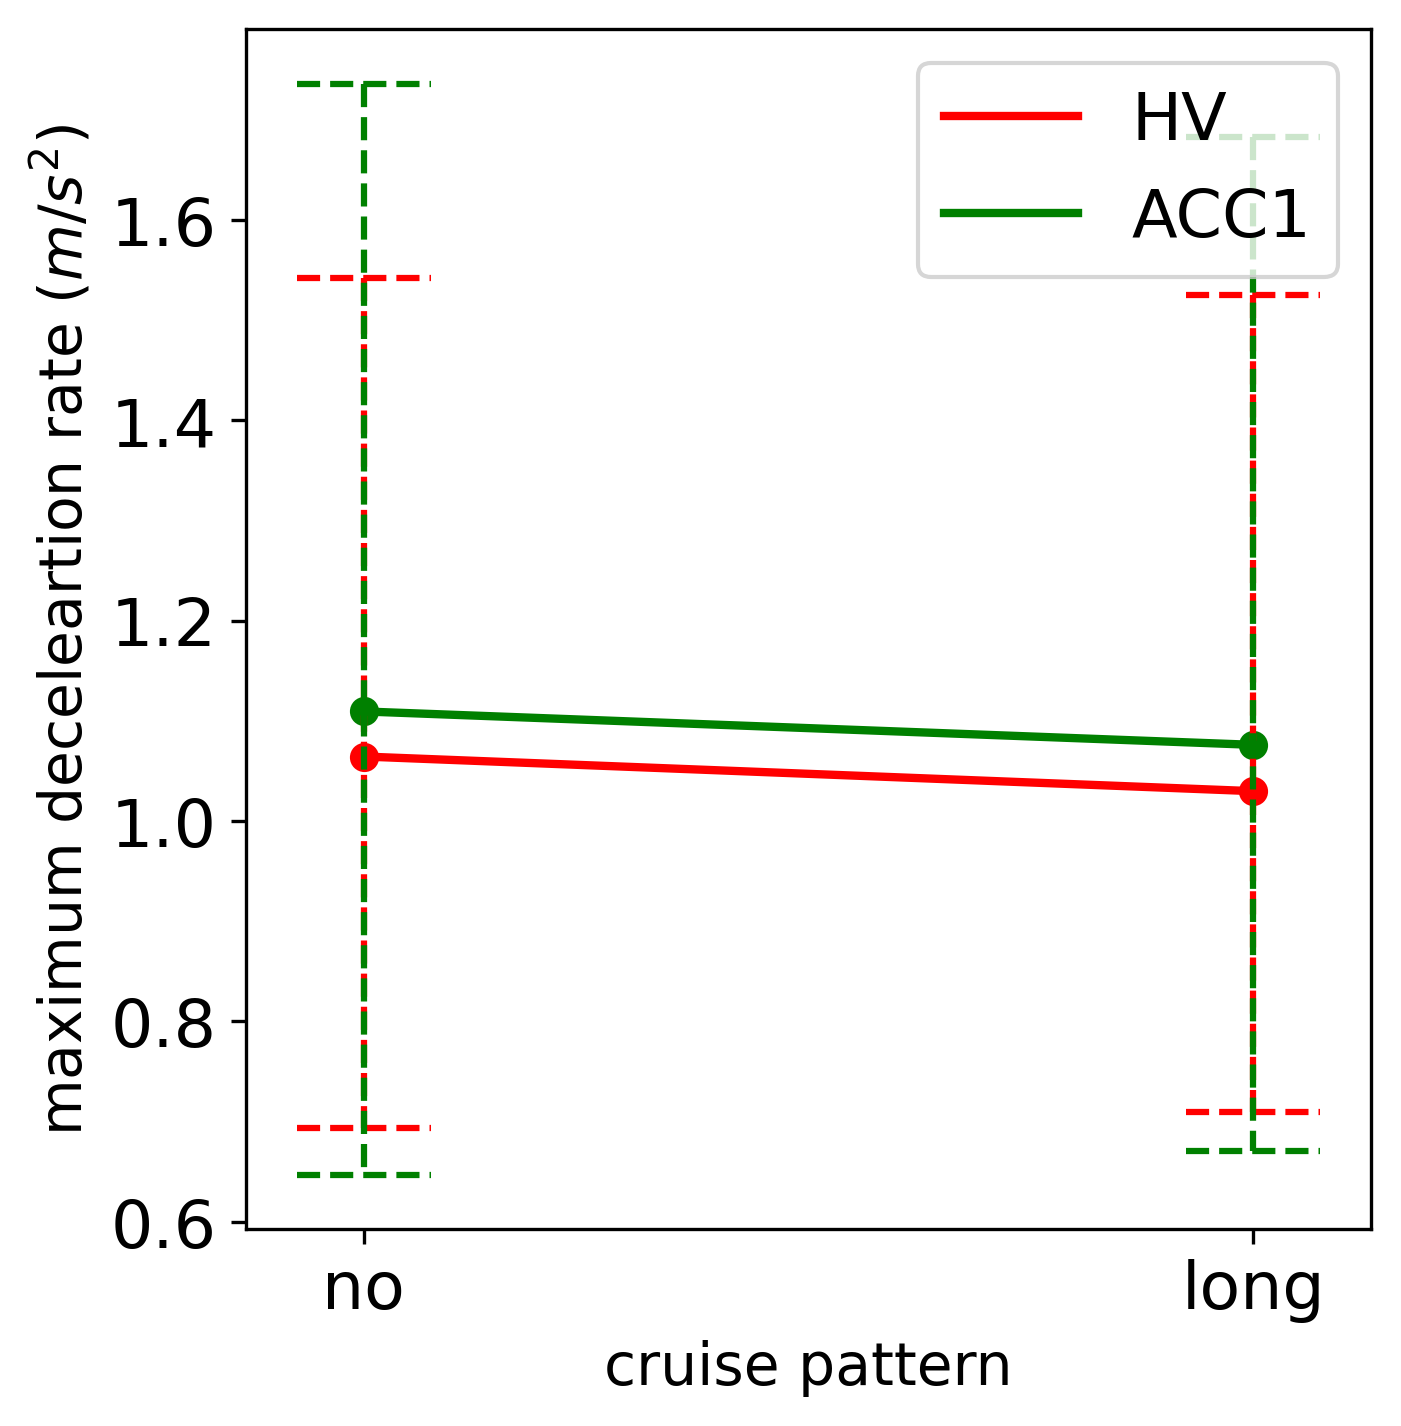

HV long 0.81 no 0.78 p-value 0.6078926109637193


ACC1 long 0.79 no 0.78 p-value 0.9324378868870429


no ACC1 0.78 HV 0.78 p-value 0.9757592769543826


long ACC1 0.79 HV 0.81 p-value 0.6568155506662782




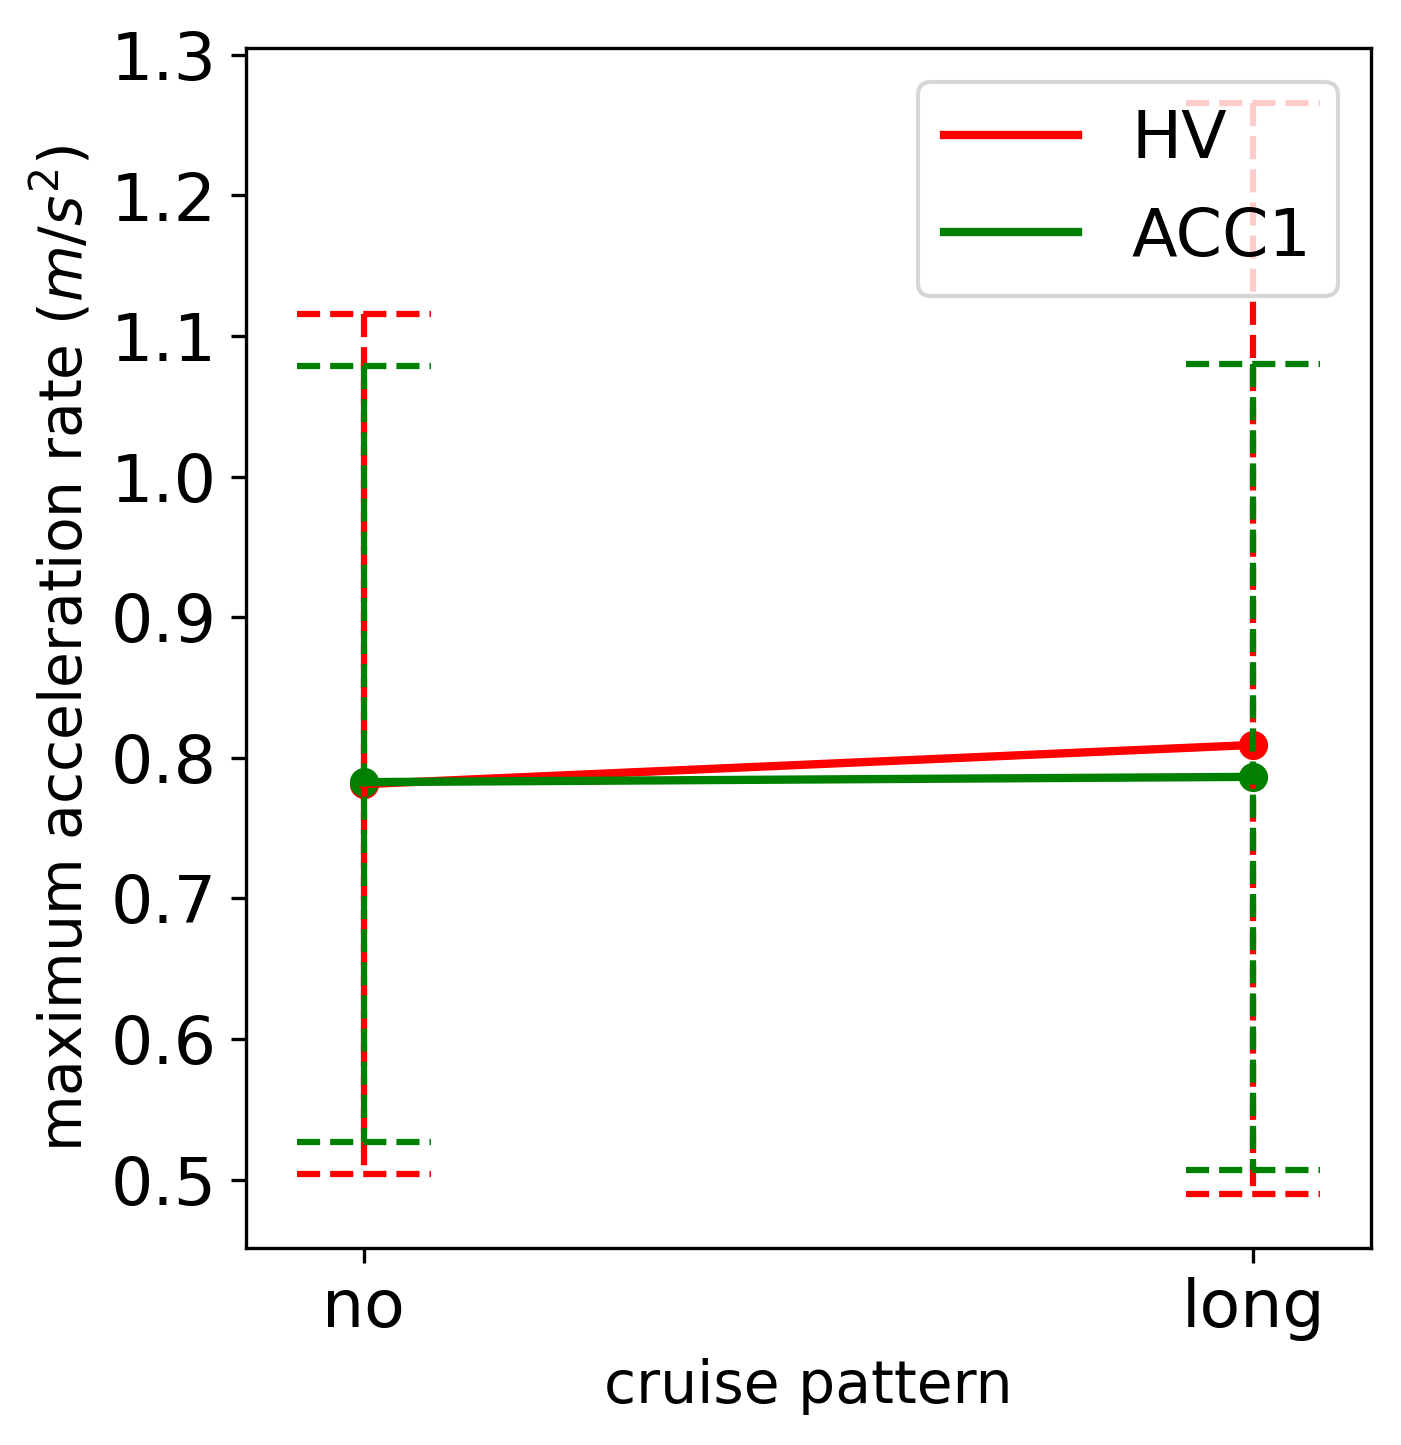

HV long 0.69 no 0.72 p-value 0.48965589694778067


ACC1 long 0.69 no 0.74 p-value 0.2981879764472773


no ACC1 0.74 HV 0.72 p-value 0.6997060834680524


long ACC1 0.69 HV 0.69 p-value 0.9932692610481597




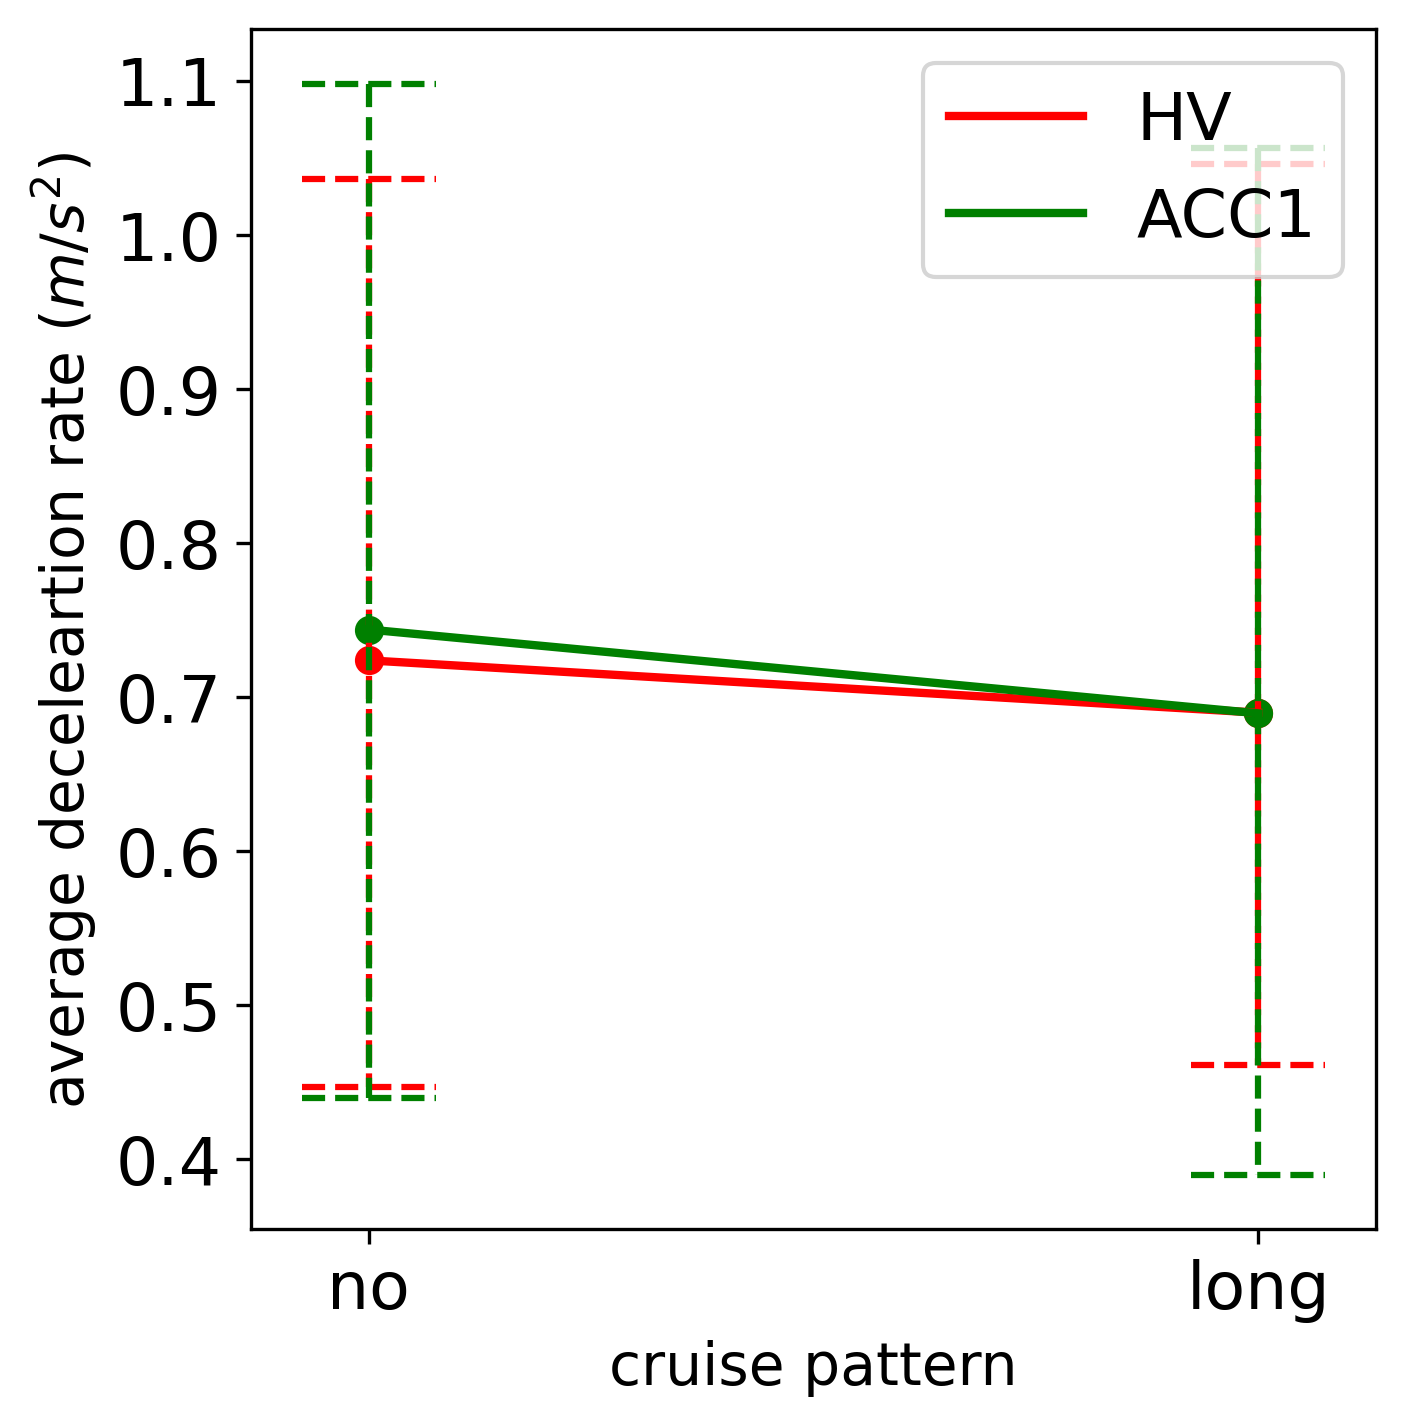

HV long 0.51 no 0.5 p-value 0.7601601771735531


ACC1 long 0.47 no 0.46 p-value 0.7291105464784158


no ACC1 0.46 HV 0.5 p-value 0.29597724609995857


long ACC1 0.47 HV 0.51 p-value 0.32898021455602733




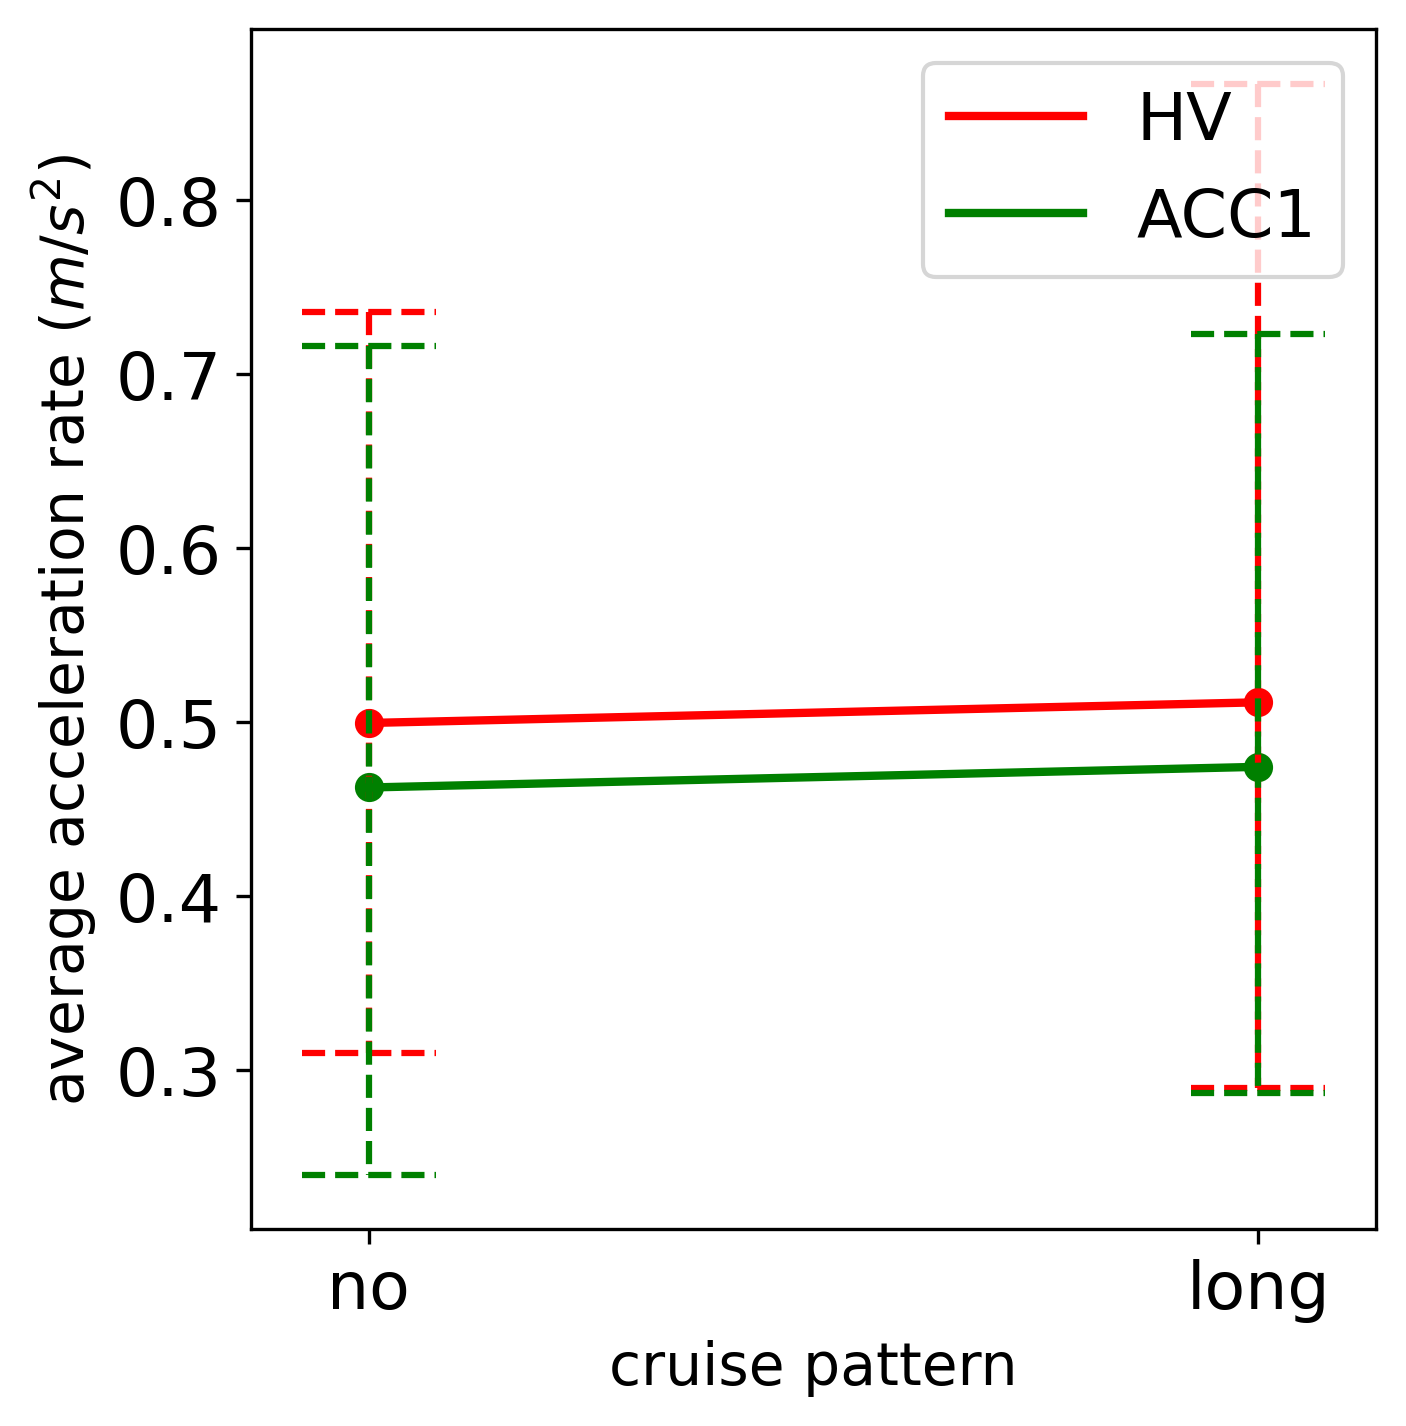

In [22]:
#3.2 deceleration & acceleration rate - cruise pattern
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][6][0][:2]\
                                    + oscillation_features_copy[i][6][2][:2] \
                                    + oscillation_features_copy[i][6][1][:2] \
                                    + oscillation_features_copy[i][6][3][:2]

impact_factor_column = 7
impact_factor_group_label = ['no', 'long']
x_label = 'cruise pattern'

feature_column_group = [15, 16]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [17, 18]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [11, 12]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [13, 14]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

HV 3 1.05 1 1.05 p-value 0.9567867095597419


ACC1 3 1.04 1 1.14 p-value 0.1996283376510755


1 ACC1 1.14 HV 1.05 p-value 0.2270275353586764


3 ACC1 1.04 HV 1.05 p-value 0.9576372860193996




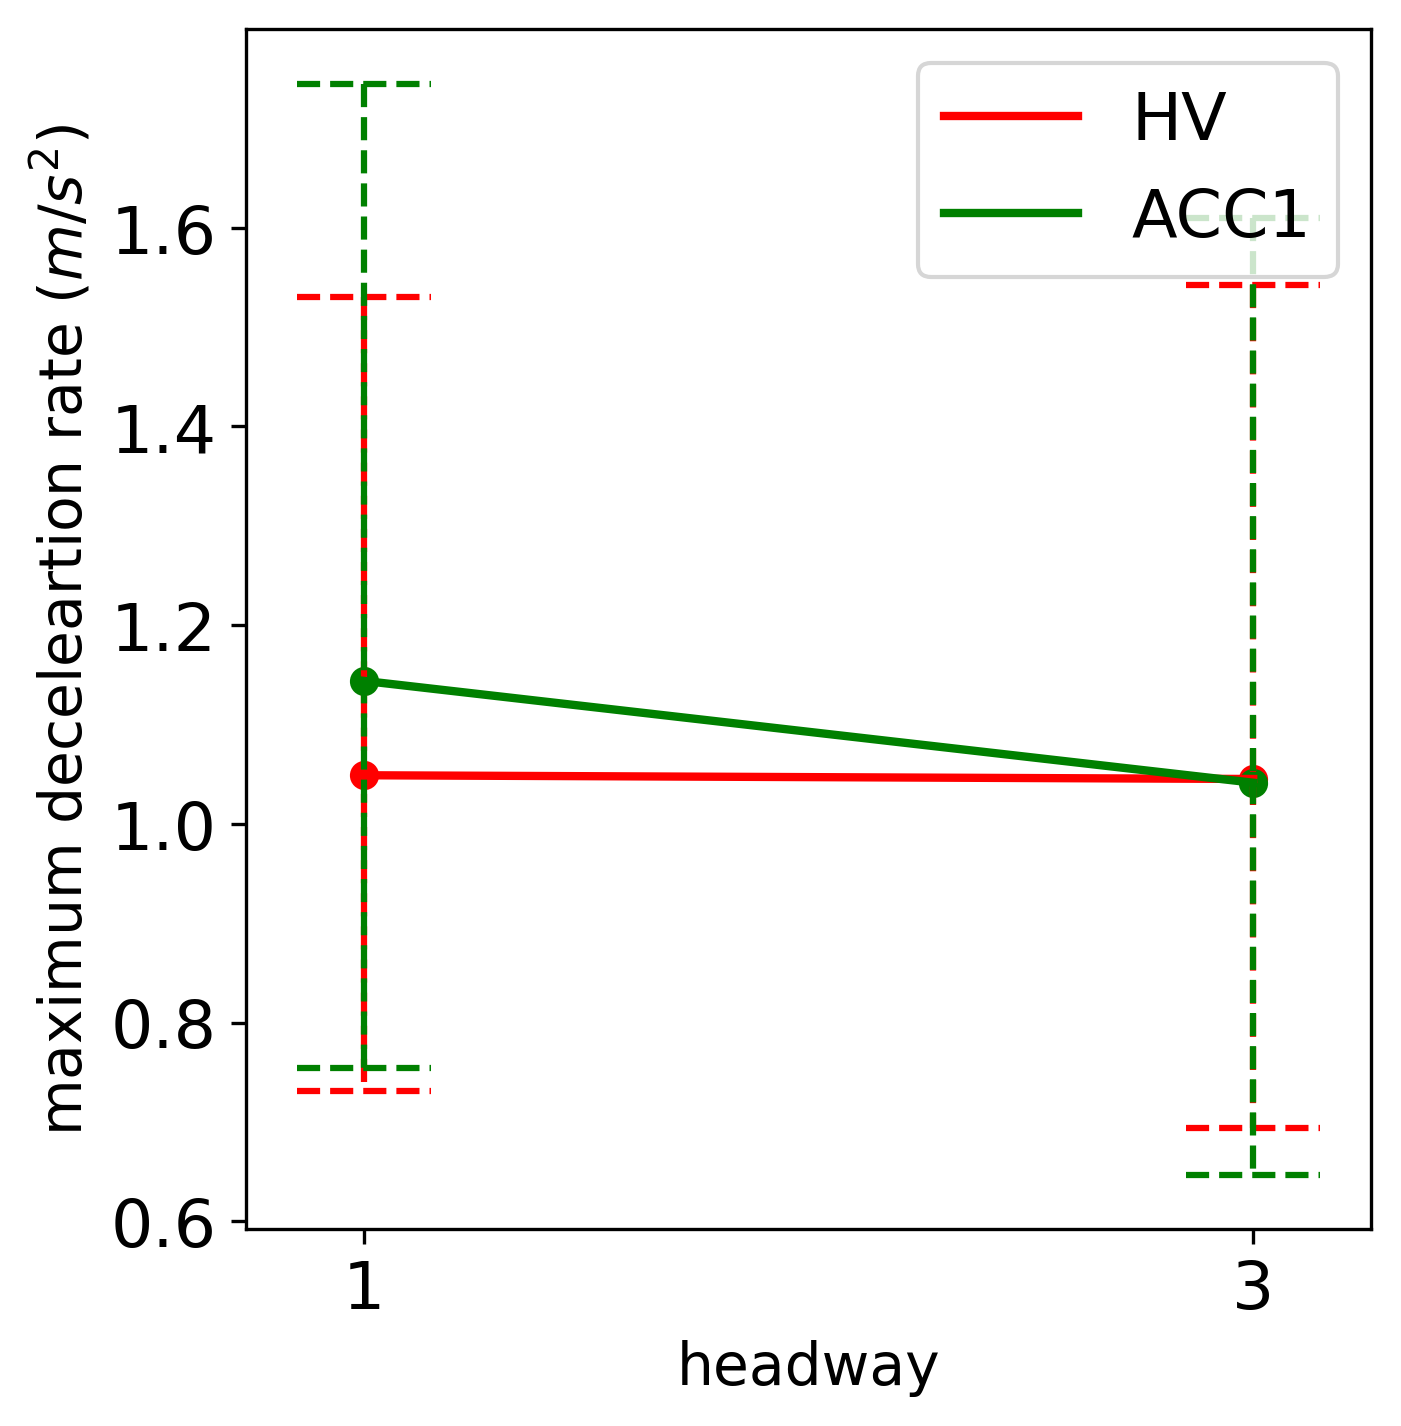

HV 3 0.78 1 0.81 p-value 0.5248733689450106


ACC1 3 0.74 1 0.83 p-value 0.039615973074348464


1 ACC1 0.83 HV 0.81 p-value 0.7184883598686488


3 ACC1 0.74 HV 0.78 p-value 0.4509049808801786




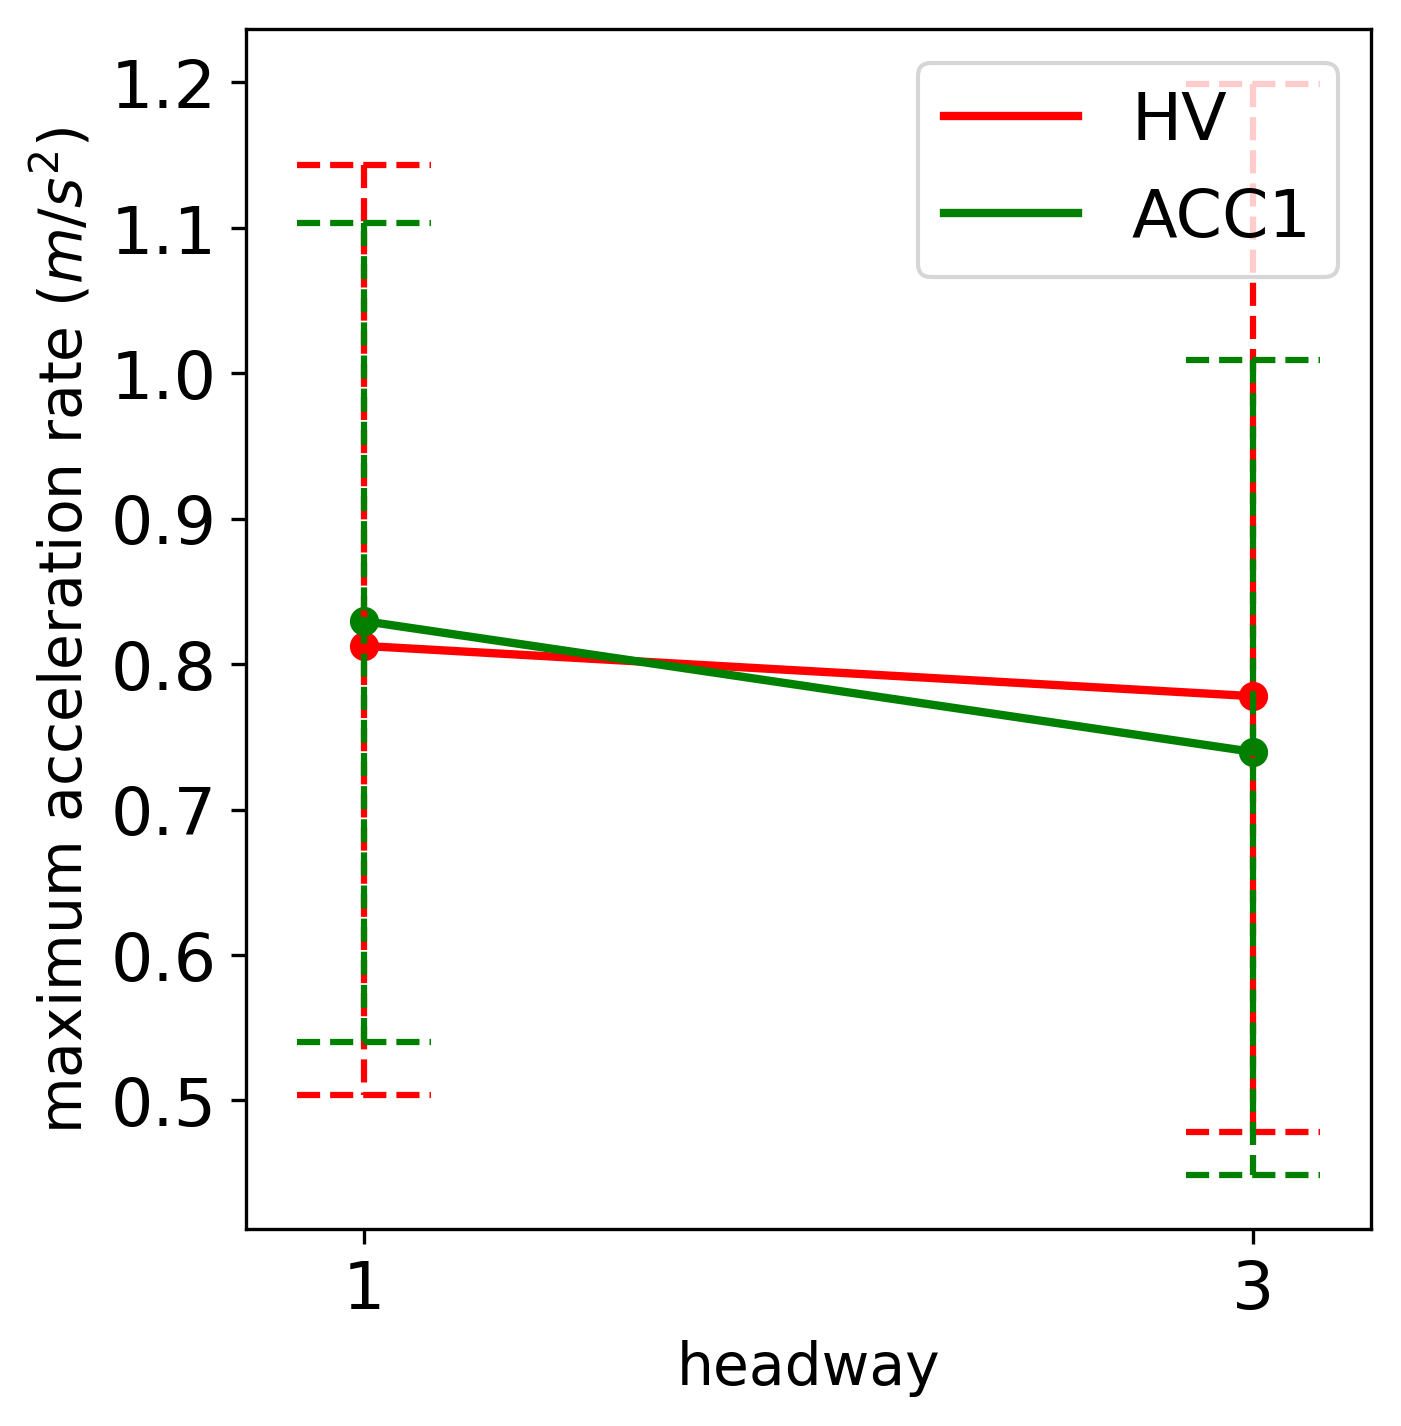

HV 3 0.7 1 0.71 p-value 0.835666551568337


ACC1 3 0.68 1 0.75 p-value 0.15840903182691873


1 ACC1 0.75 HV 0.71 p-value 0.4575987008966911


3 ACC1 0.68 HV 0.7 p-value 0.6254057978016525




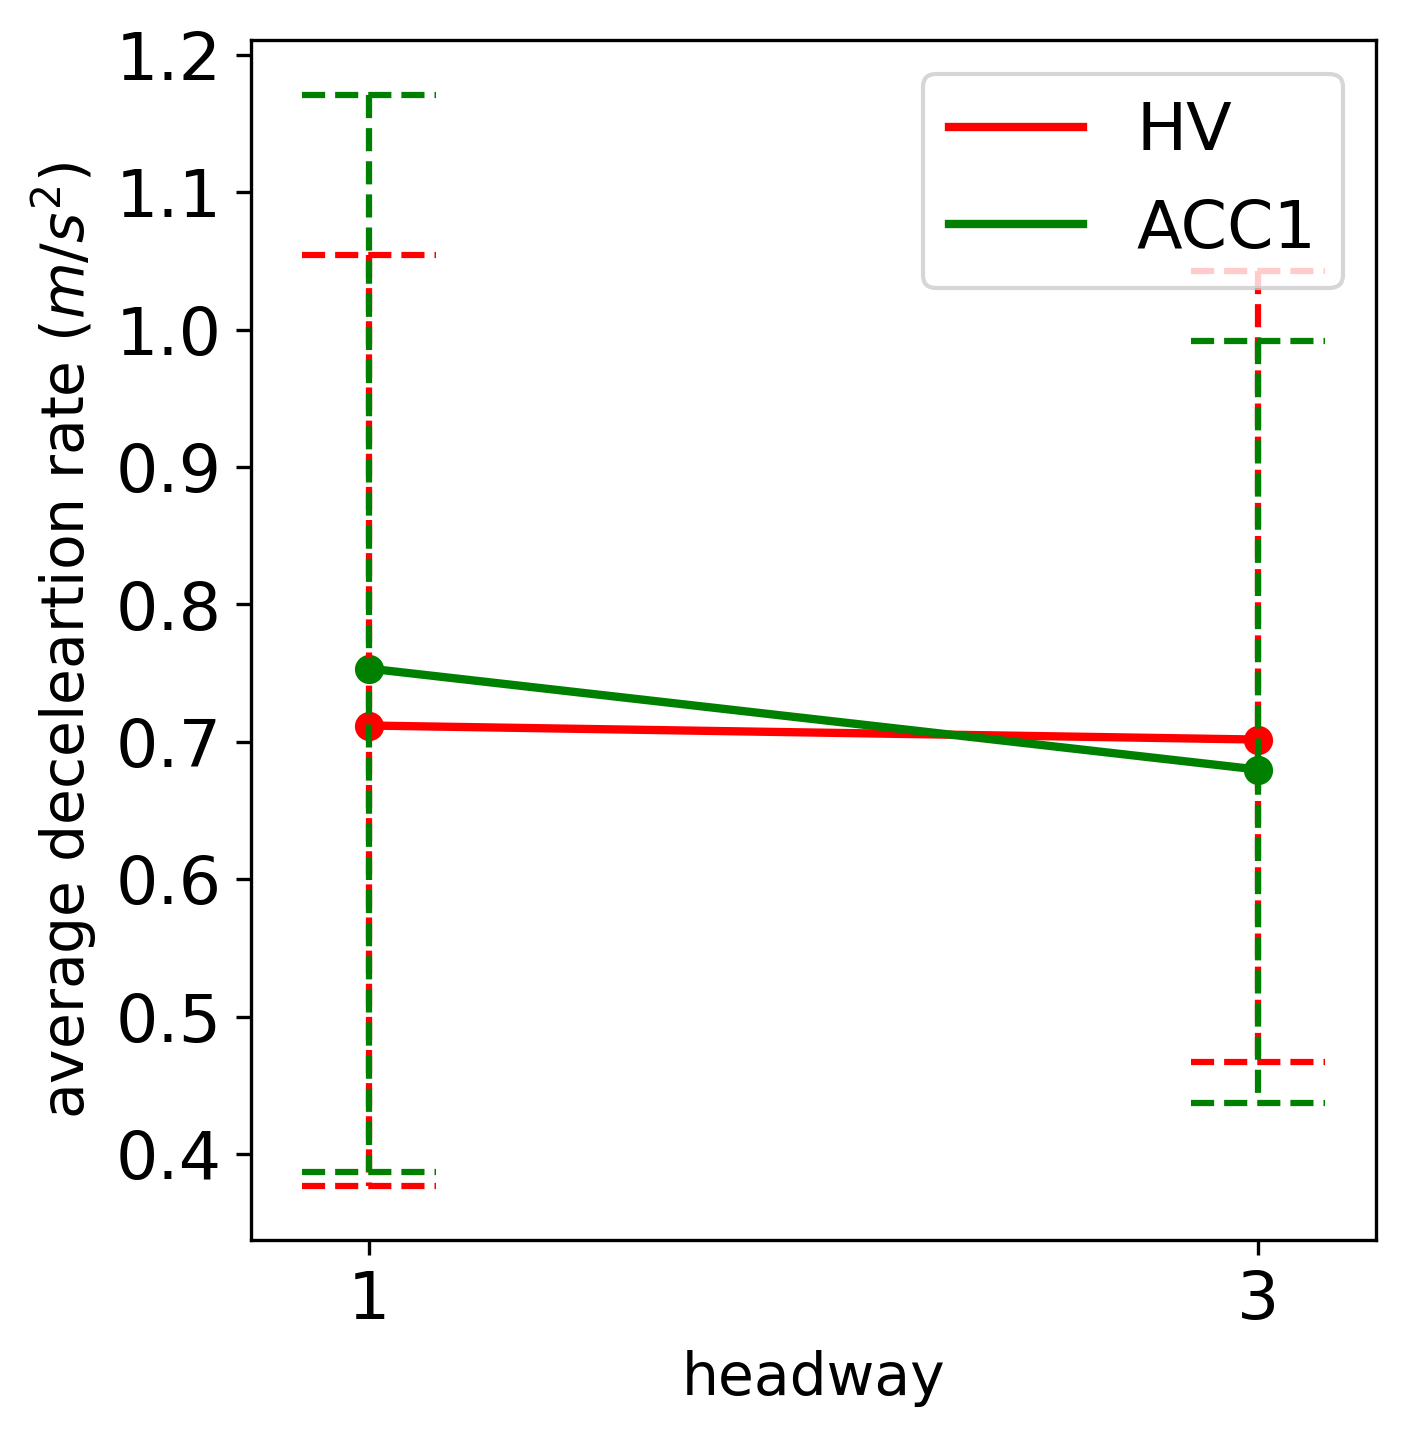

HV 3 0.49 1 0.52 p-value 0.5591192137509925


ACC1 3 0.44 1 0.5 p-value 0.0767236826436024


1 ACC1 0.5 HV 0.52 p-value 0.6012116996471142


3 ACC1 0.44 HV 0.49 p-value 0.14040272202799306




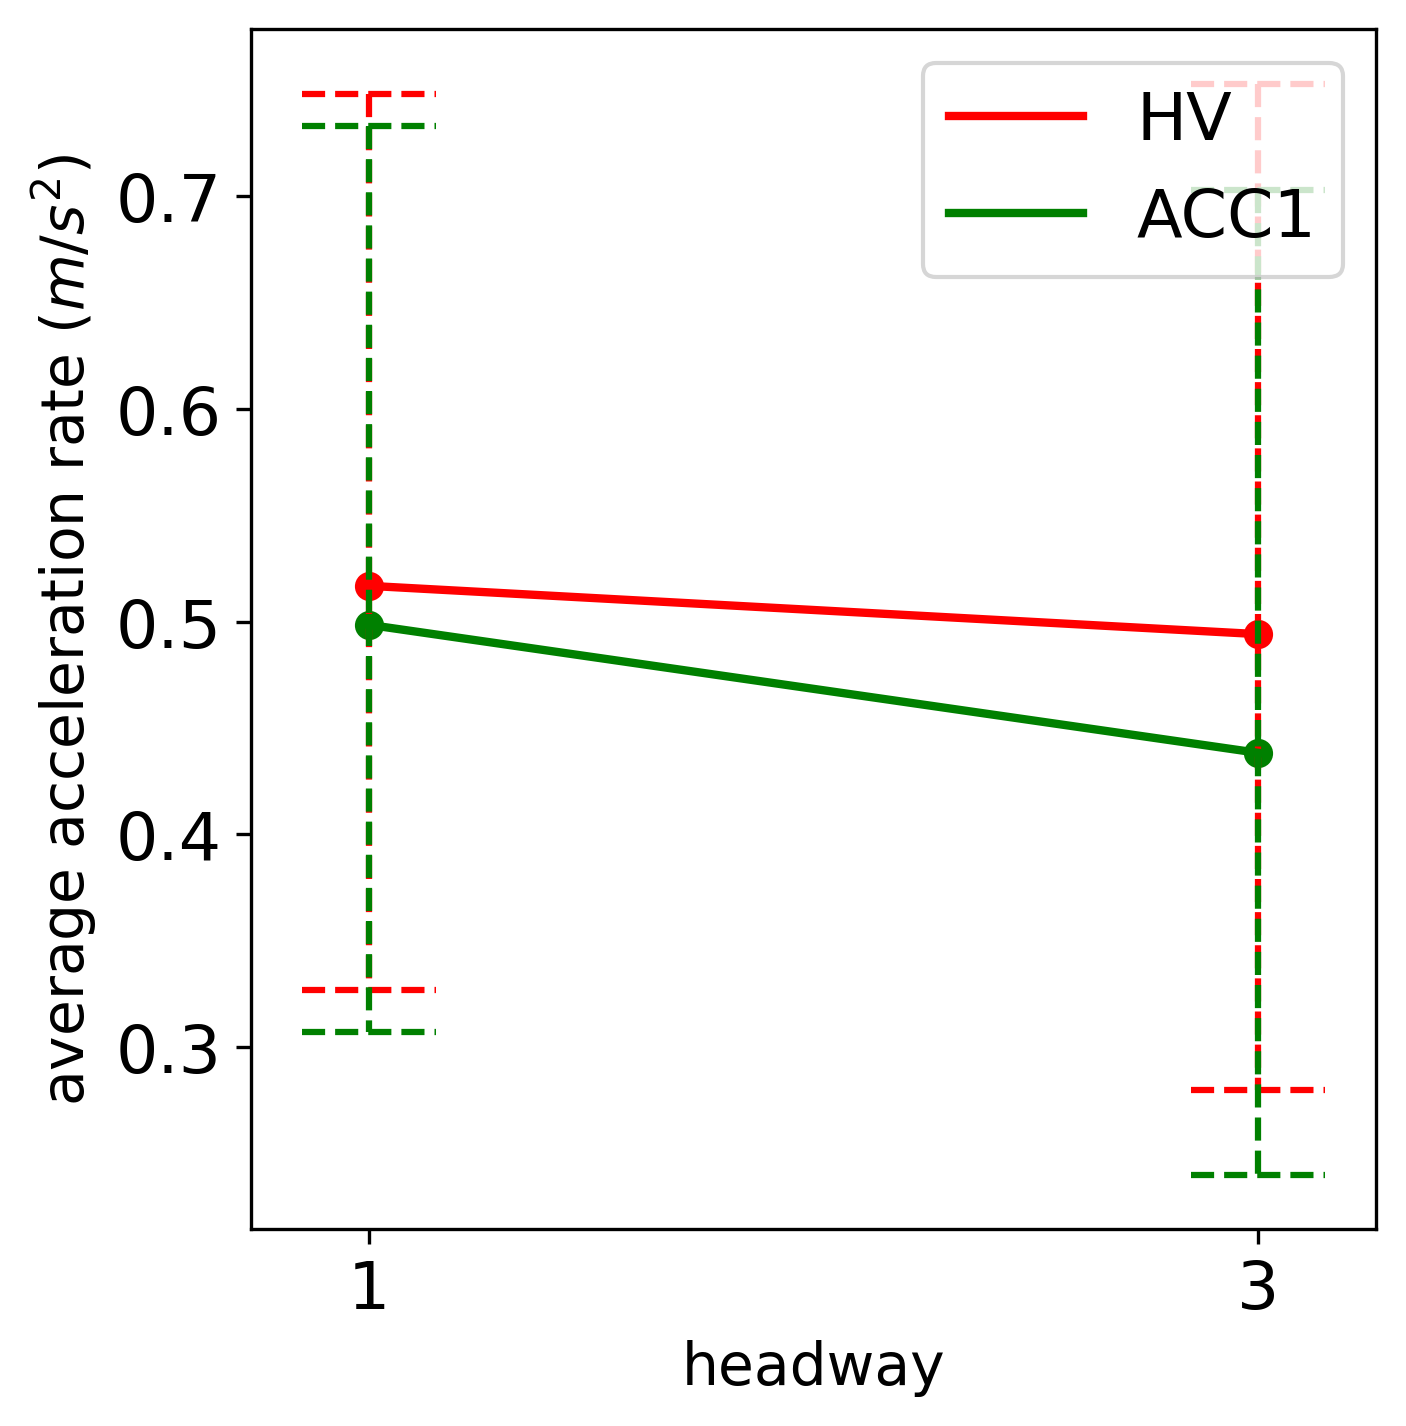

In [23]:
#3.3 deceleration & acceleration rate - headway
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][6][0][:2]\
                                    + oscillation_features_copy[i][6][2][:2] \
                                    + oscillation_features_copy[i][6][1][:2] \
                                    + oscillation_features_copy[i][6][3][:2]

impact_factor_column = 8
impact_factor_group_label = ['1', '3']
x_label = 'headway'

feature_column_group = [15, 16]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [17, 18]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [11, 12]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [13, 14]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

HV mild 0.82 strong 1.27 p-value 1.3800067805087904e-13


ACC1 mild 0.82 strong 1.37 p-value 8.267244175053078e-16


strong ACC1 1.37 HV 1.27 p-value 0.1579073305717984


mild ACC1 0.82 HV 0.82 p-value 0.861188458157129




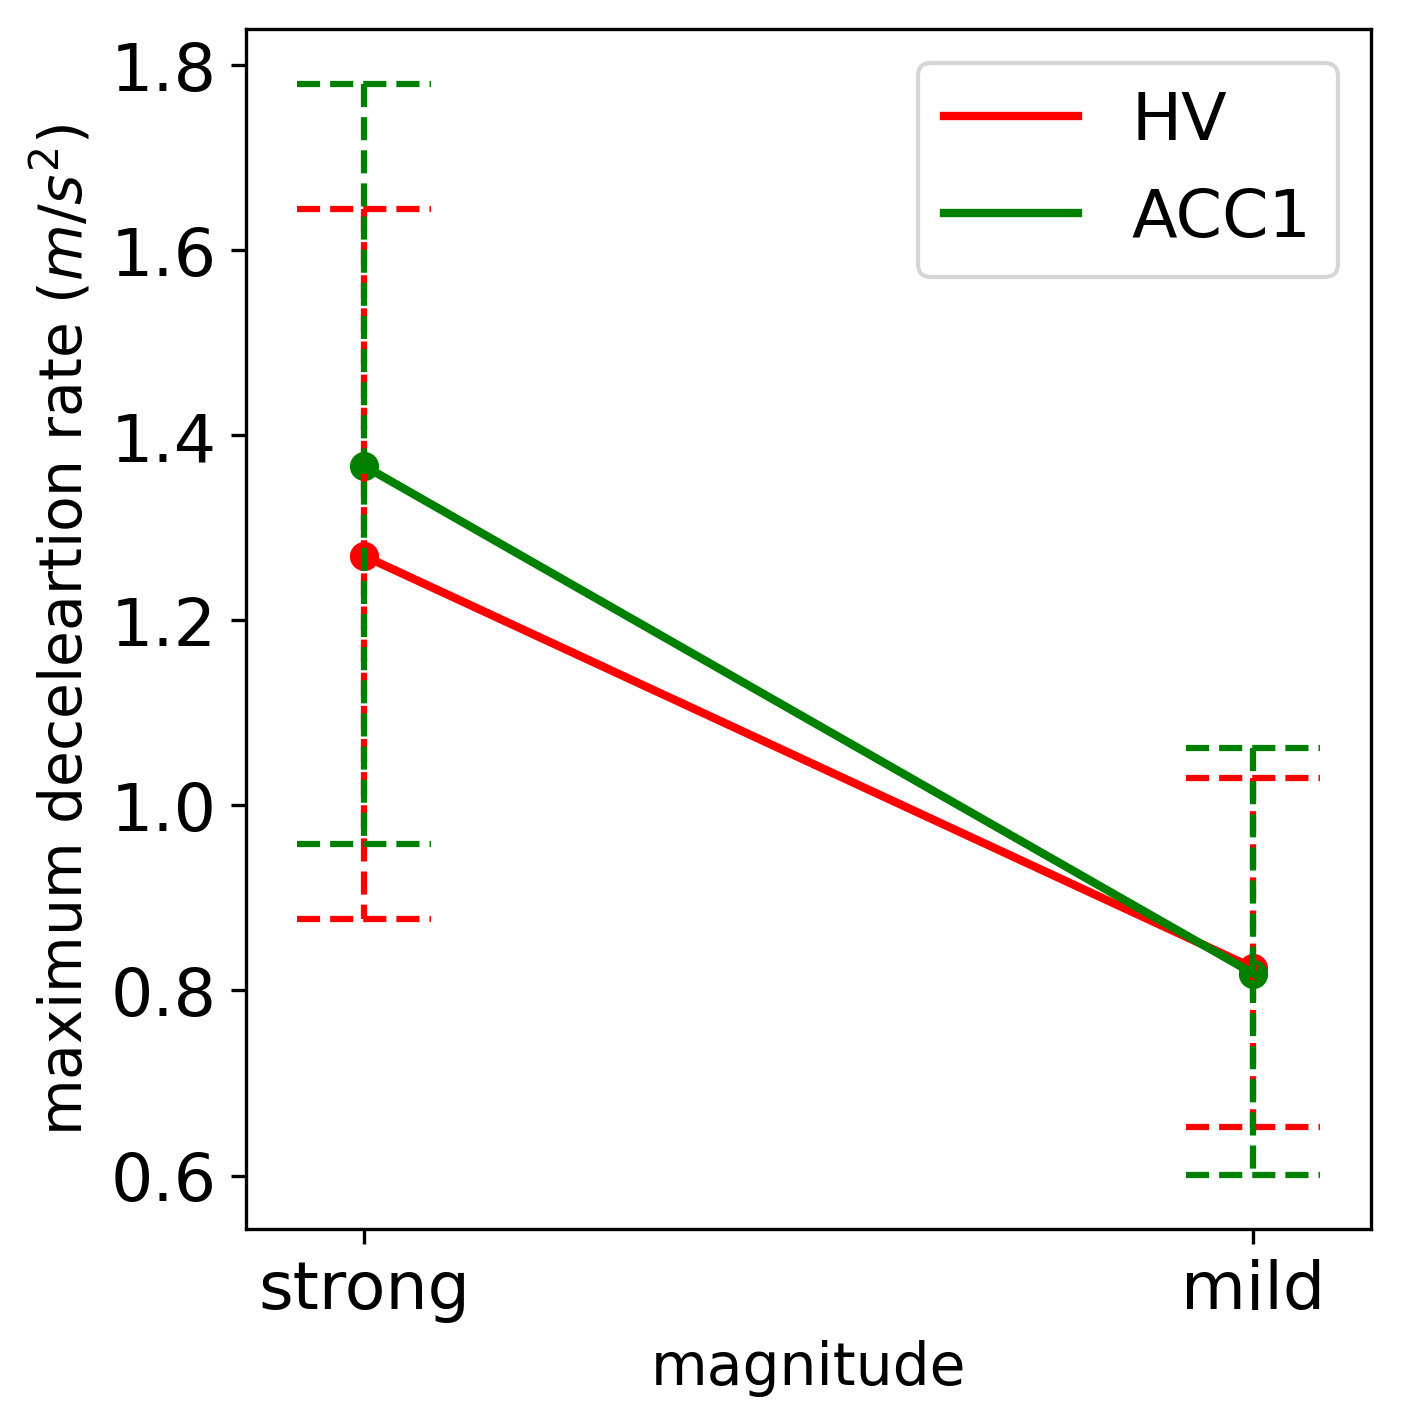

HV mild 0.66 strong 0.93 p-value 2.7289840456117753e-07


ACC1 mild 0.65 strong 0.92 p-value 1.0604337507618195e-11


strong ACC1 0.92 HV 0.93 p-value 0.8743102368042225


mild ACC1 0.65 HV 0.66 p-value 0.6767535521957257




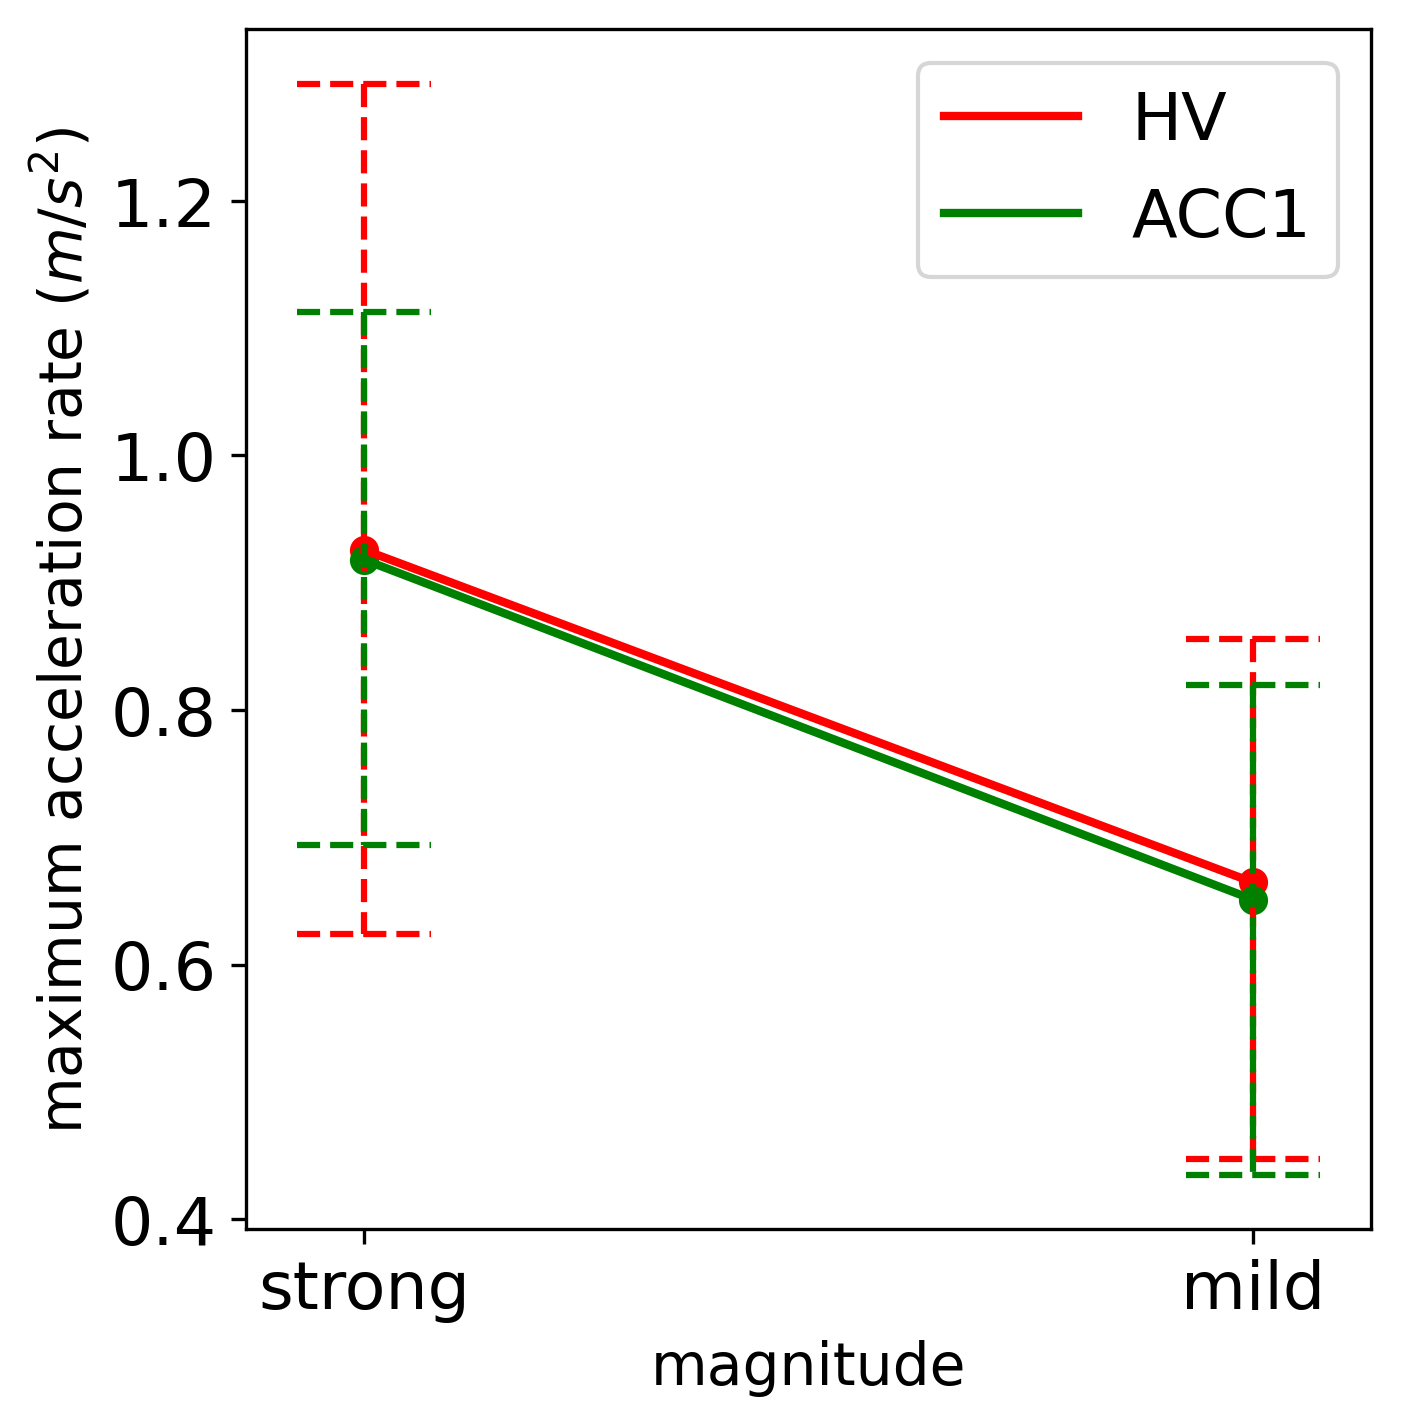

HV mild 0.57 strong 0.85 p-value 4.075610422124745e-10


ACC1 mild 0.56 strong 0.87 p-value 1.47176231502888e-11


strong ACC1 0.87 HV 0.85 p-value 0.5569525776380964


mild ACC1 0.56 HV 0.57 p-value 0.7865289076329438




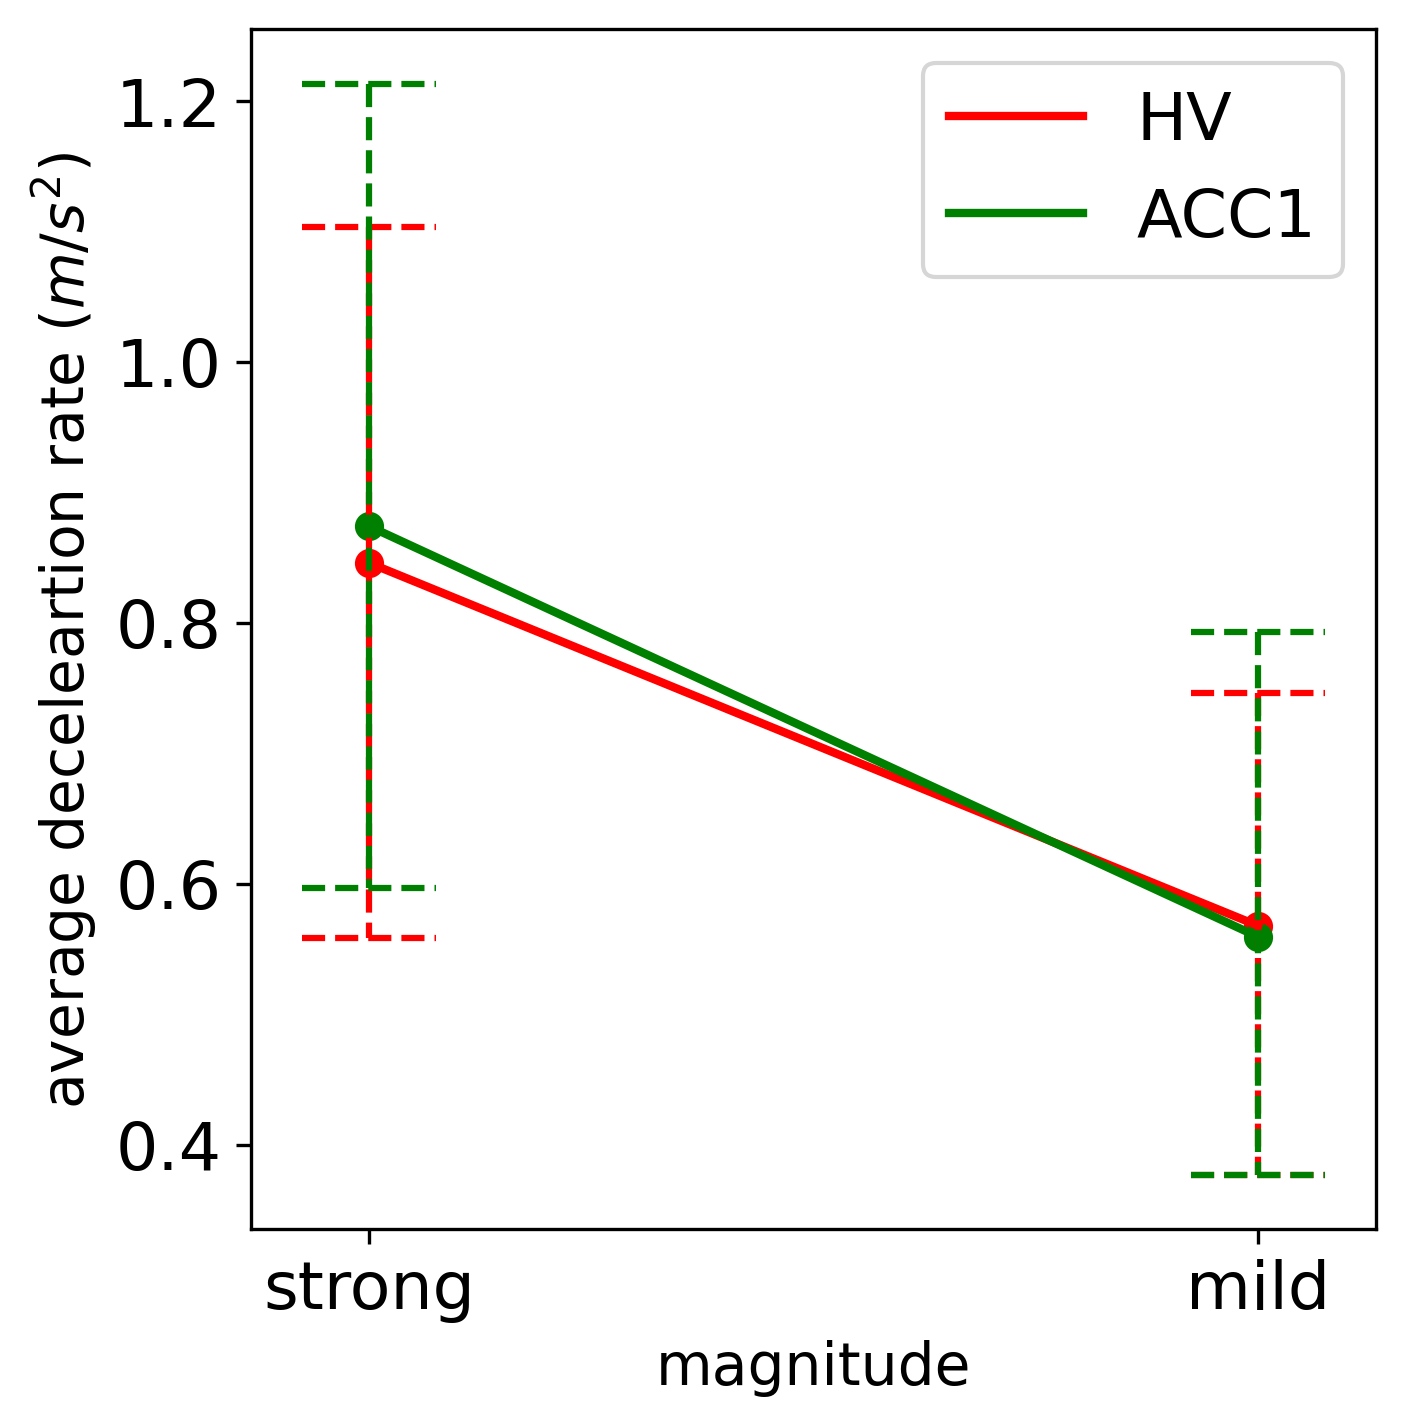

HV mild 0.43 strong 0.58 p-value 0.00010295195302493535


ACC1 mild 0.38 strong 0.56 p-value 1.6920908030520602e-08


strong ACC1 0.56 HV 0.58 p-value 0.5896796446322095


mild ACC1 0.38 HV 0.43 p-value 0.040131420772606036




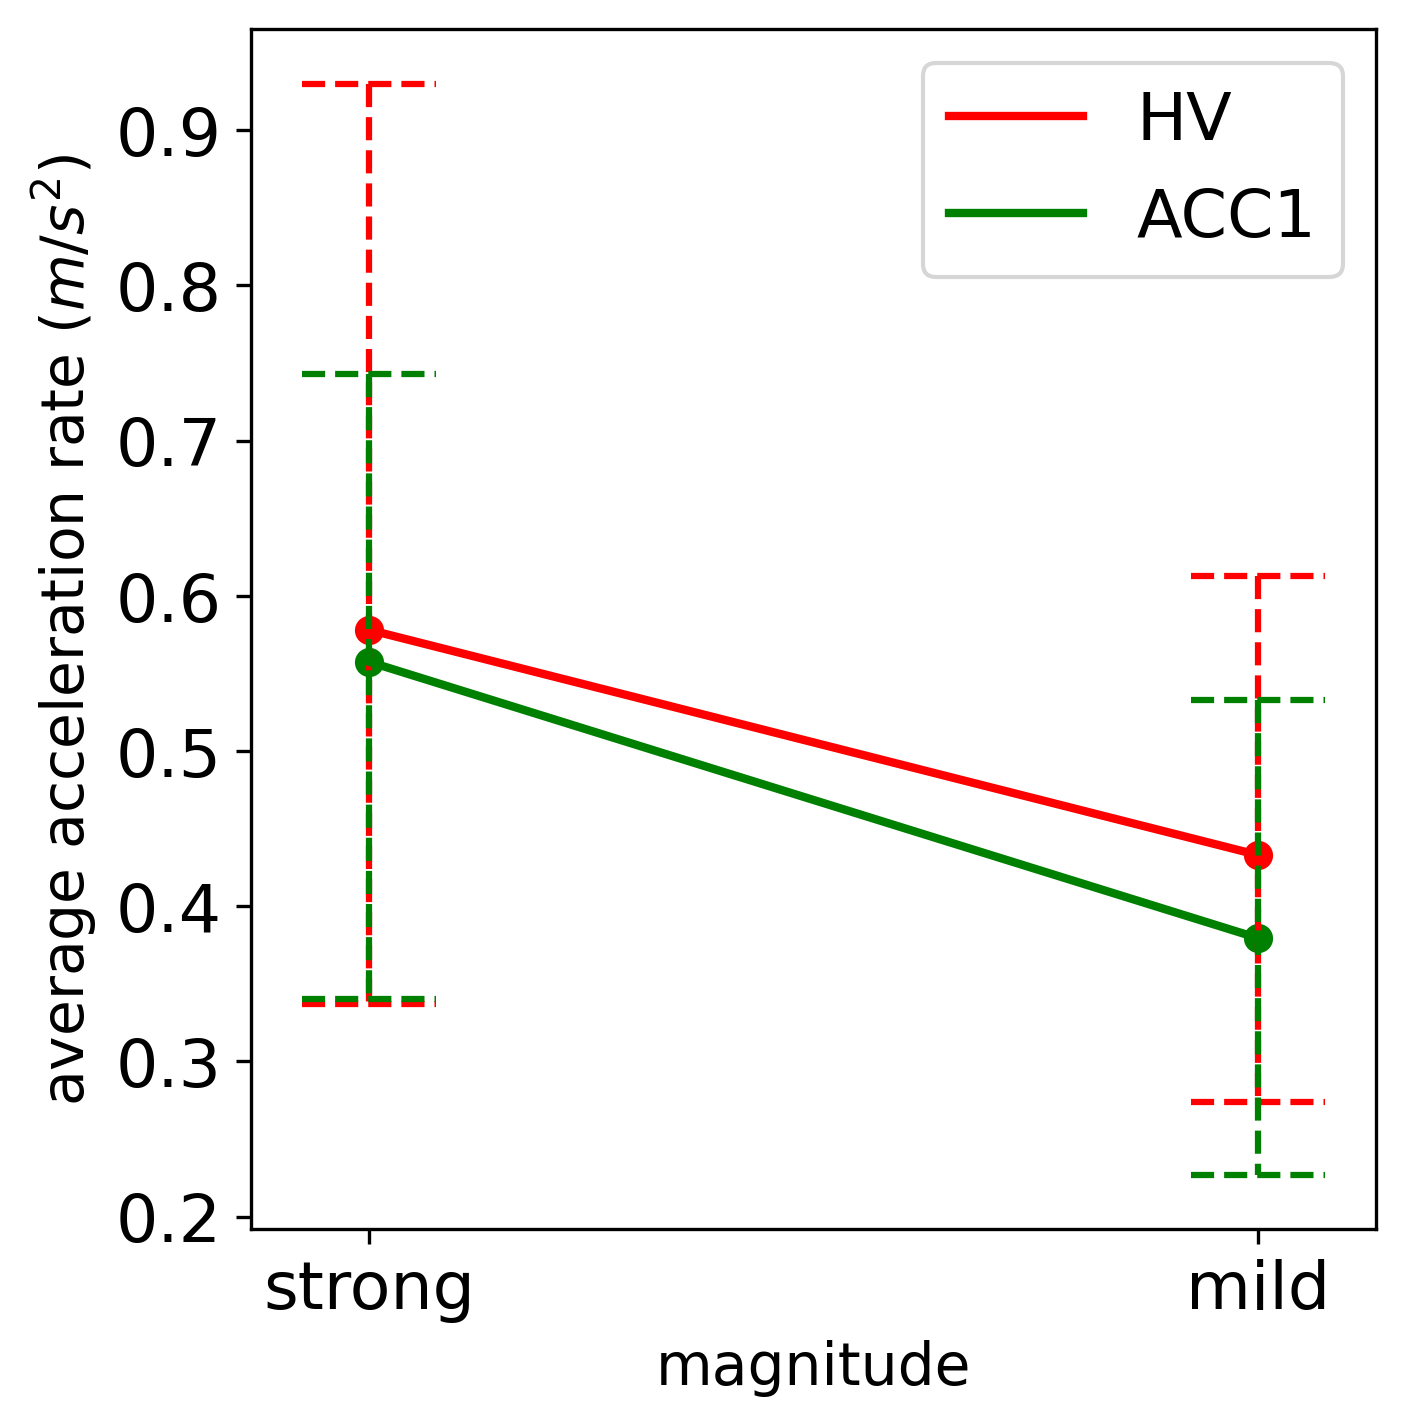

In [24]:
#3.4 deceleration & acceleration rate - magnitude
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][6][0][:2]\
                                    + oscillation_features_copy[i][6][2][:2] \
                                    + oscillation_features_copy[i][6][1][:2] \
                                    + oscillation_features_copy[i][6][3][:2]

impact_factor_column = 9
impact_factor_group_label = ['strong', 'mild']
x_label = 'magnitude'

feature_column_group = [15, 16]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [17, 18]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [11, 12]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [13, 14]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

HV mild 0.86 strong 1.51 p-value 1.2378703567272665e-32


ACC1 mild 0.88 strong 1.6 p-value 1.2523839120502237e-26


strong ACC1 1.6 HV 1.51 p-value 0.07481006078090173


mild ACC1 0.88 HV 0.86 p-value 0.41473673957047963




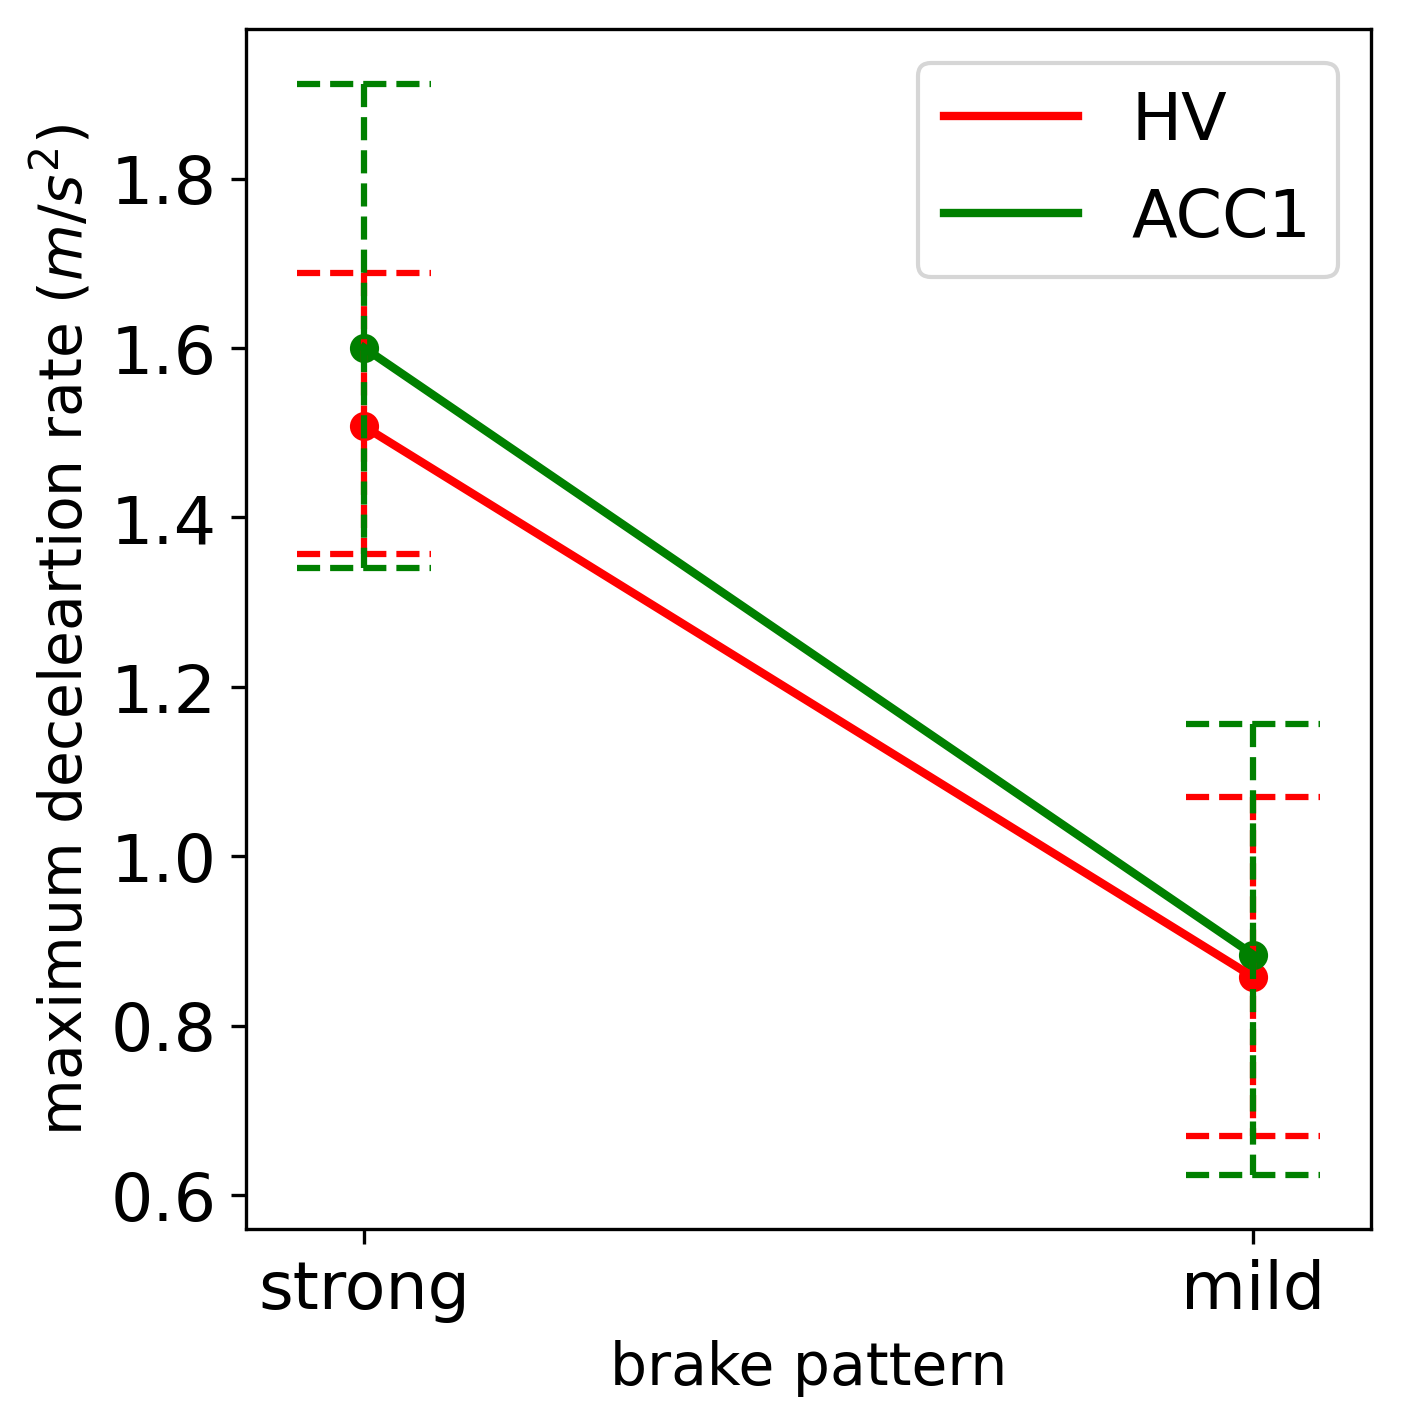

HV mild 0.66 strong 1.11 p-value 1.359120597803661e-20


ACC1 mild 0.69 strong 1.02 p-value 2.109817805187318e-15


strong ACC1 1.02 HV 1.11 p-value 0.04341681793838682


mild ACC1 0.69 HV 0.66 p-value 0.35916125862745185




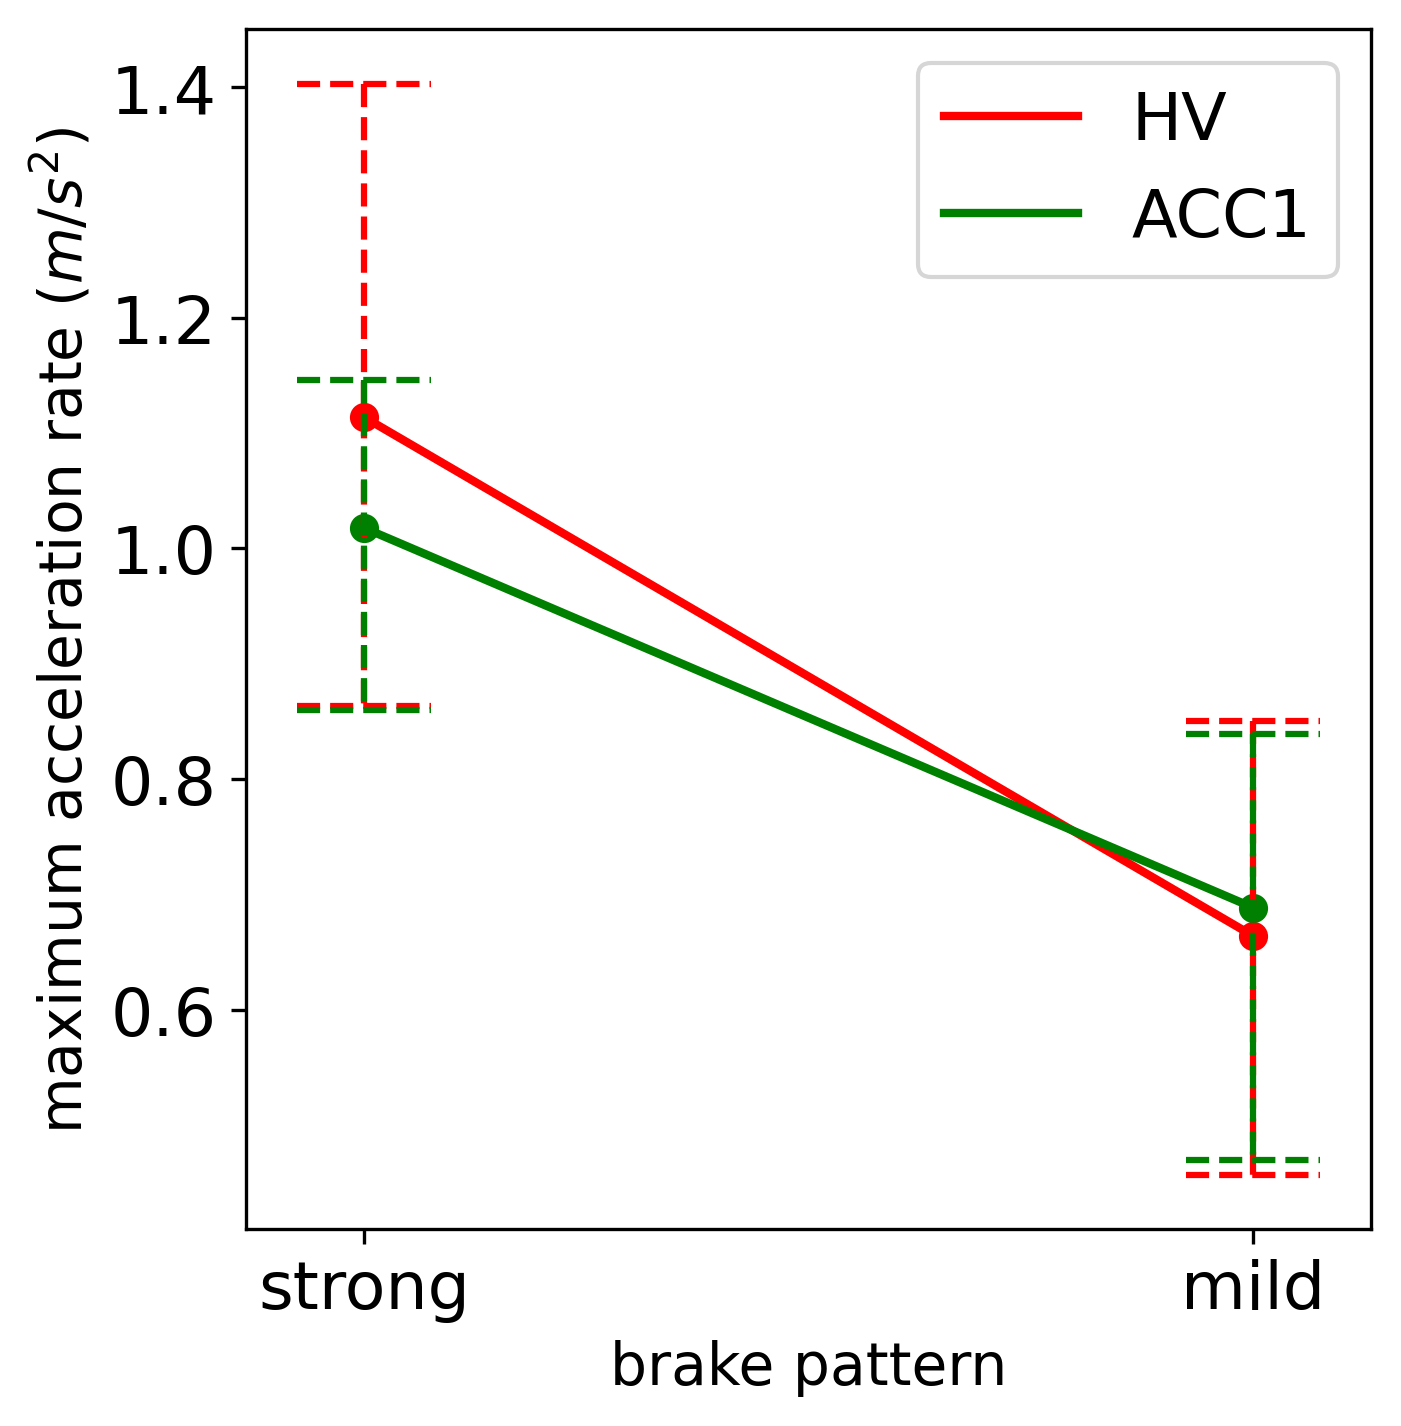

HV mild 0.58 strong 1.01 p-value 5.688316469575915e-25


ACC1 mild 0.59 strong 1.02 p-value 1.436198504500051e-19


strong ACC1 1.02 HV 1.01 p-value 0.8892708178381499


mild ACC1 0.59 HV 0.58 p-value 0.6581561694728159




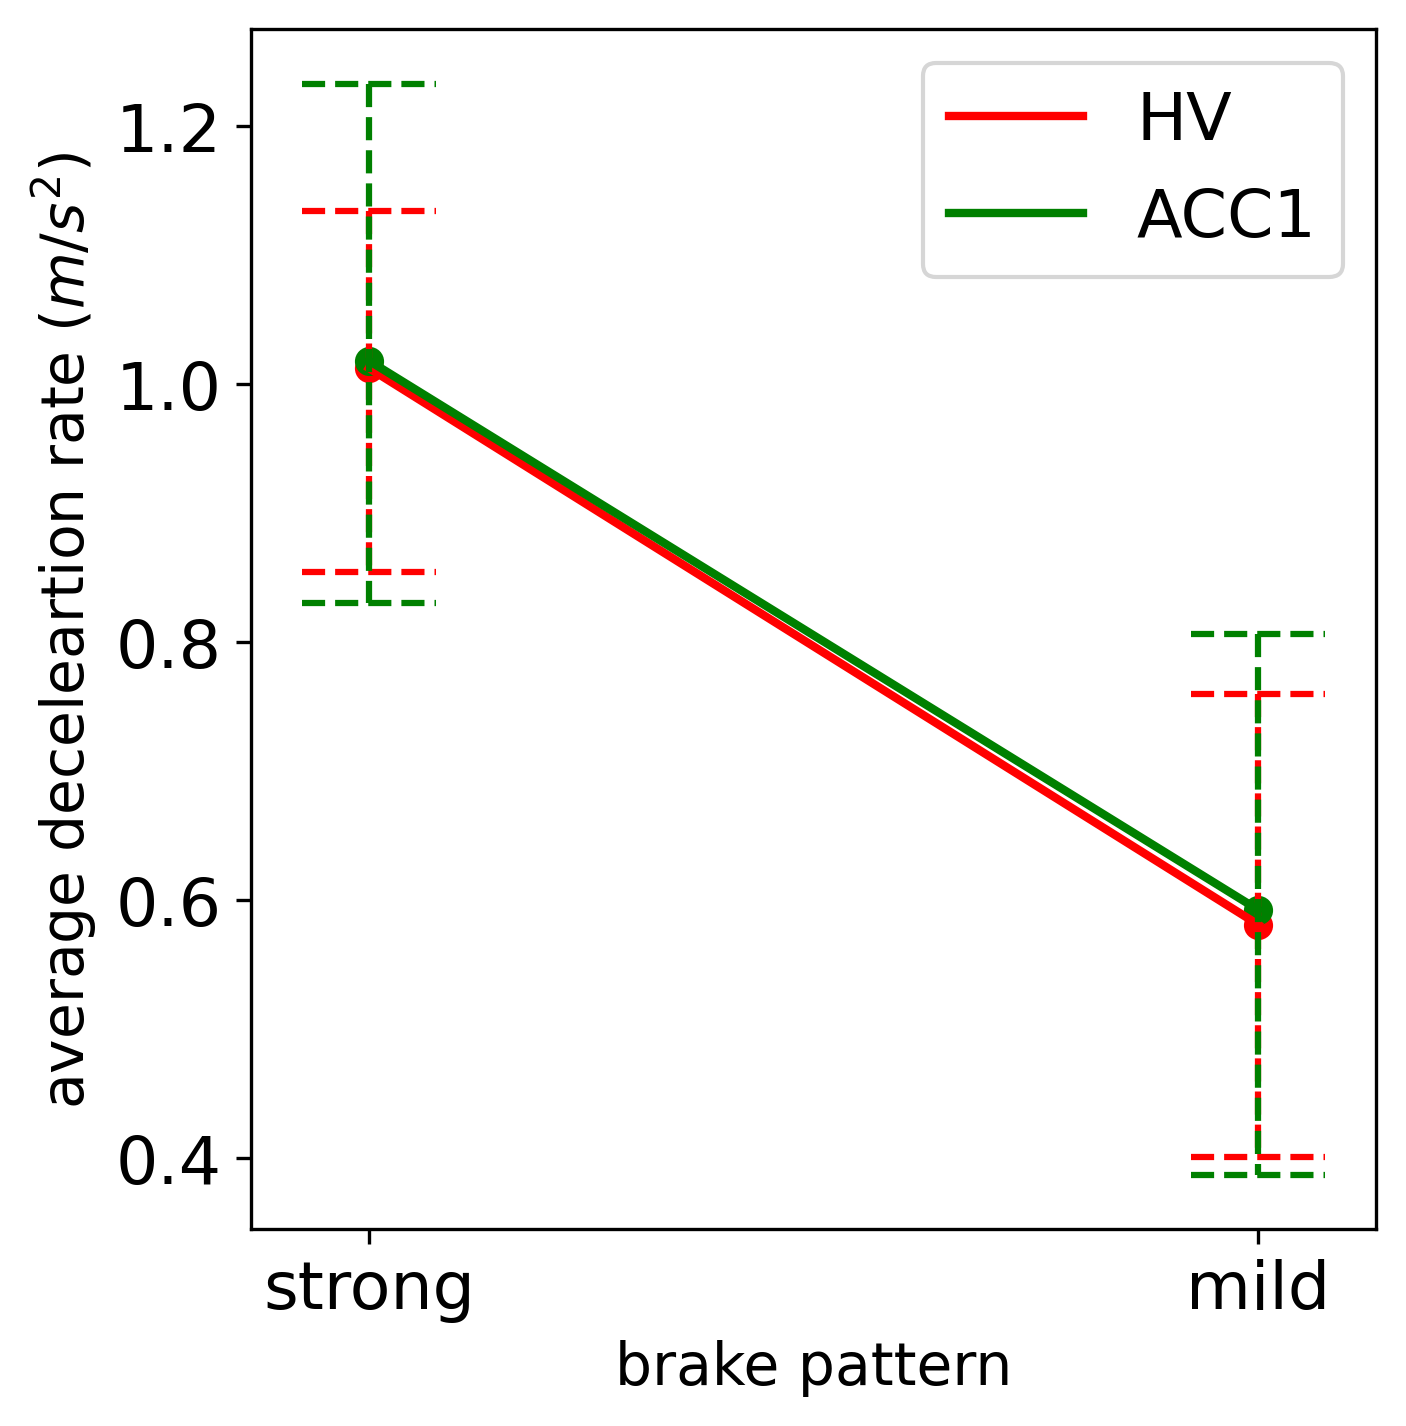

HV mild 0.43 strong 0.7 p-value 3.500303372079558e-13


ACC1 mild 0.4 strong 0.63 p-value 4.215920592464122e-11


strong ACC1 0.63 HV 0.7 p-value 0.10795888239685066


mild ACC1 0.4 HV 0.43 p-value 0.2950949200358829




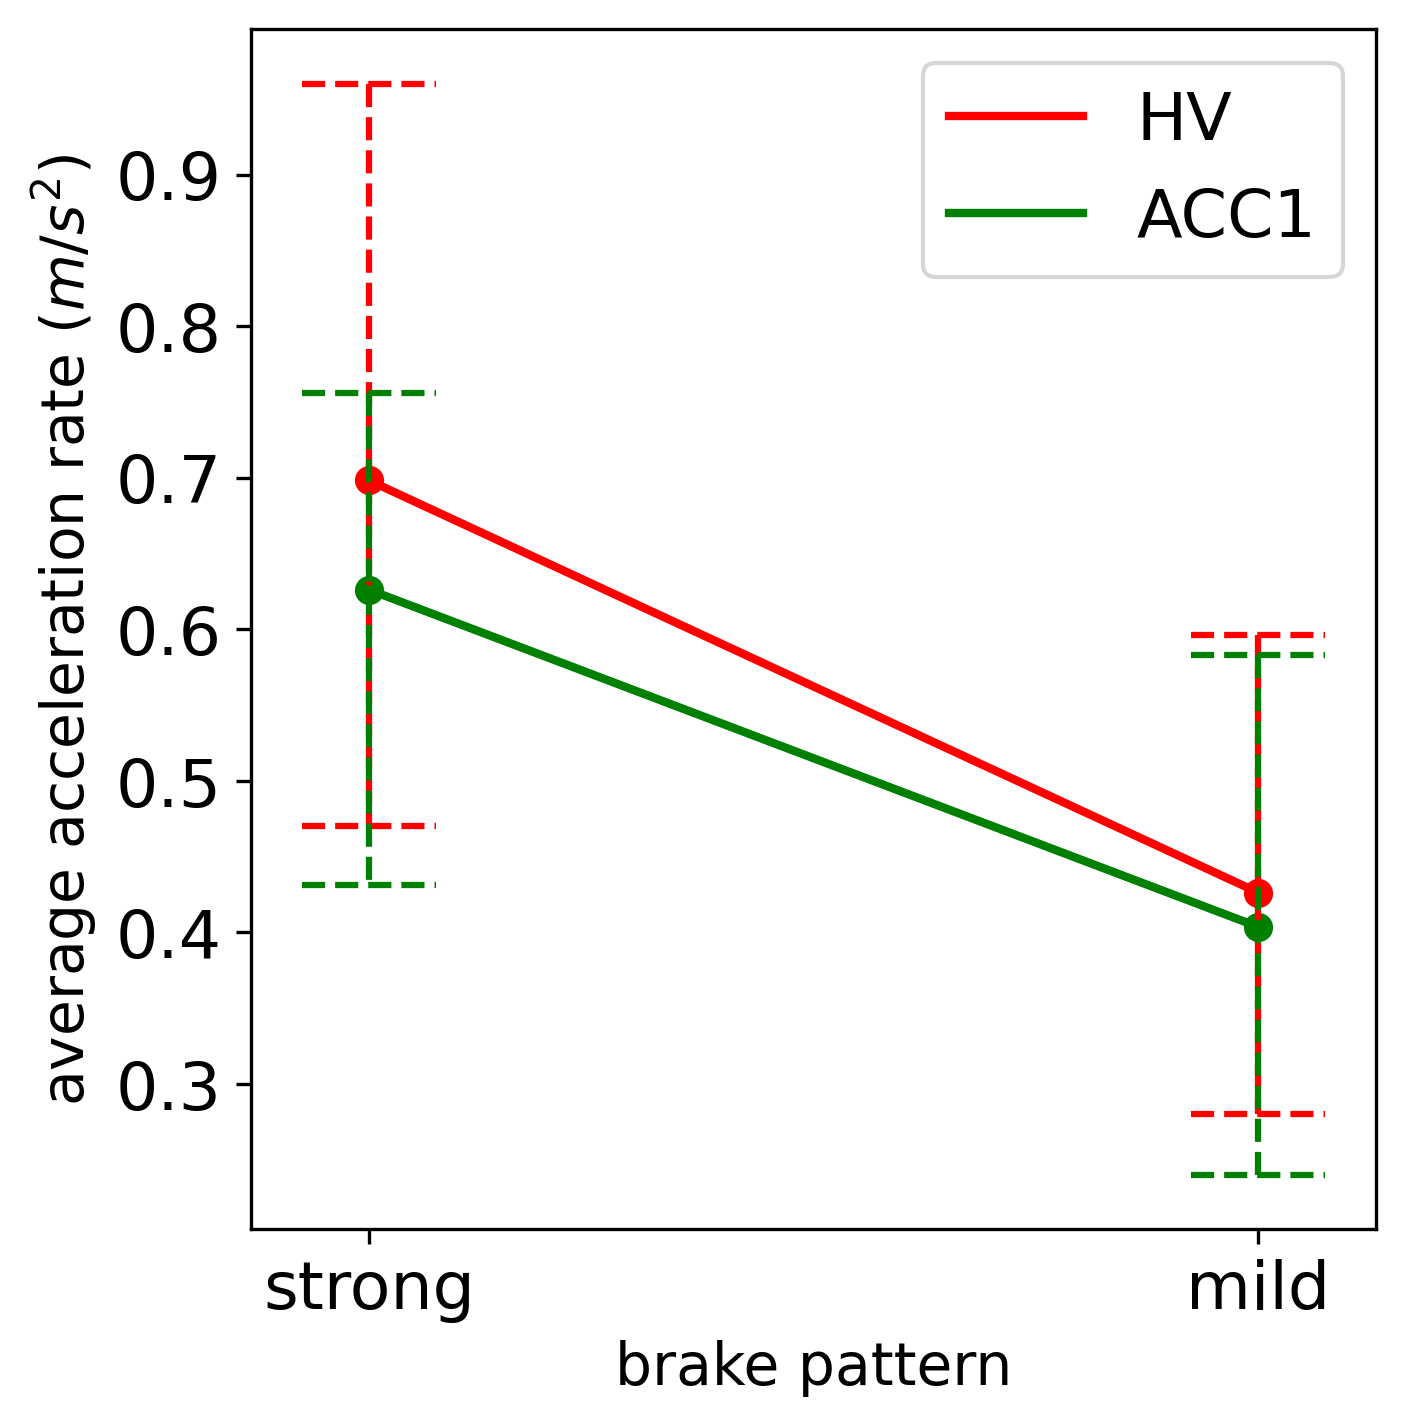

In [25]:
#3.5 deceleration & acceleration rate - brake pattern
oscillation_features_copy = oscillation_features.copy()
for i in range(len(oscillation_features_copy)):
    oscillation_features_copy[i] = oscillation_features_copy[i] + oscillation_features_copy[i][6][0][:2]\
                                    + oscillation_features_copy[i][6][2][:2] \
                                    + oscillation_features_copy[i][6][1][:2] \
                                    + oscillation_features_copy[i][6][3][:2]

impact_factor_column = 10
impact_factor_group_label = ['strong', 'mild']
x_label = 'brake pattern'

feature_column_group = [15, 16]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [17, 18]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'maximum acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [11, 12]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average deceleartion rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)

feature_column_group = [13, 14]
feature_column_group_label = ['HV', 'ACC1']
y_label = 'average acceleration rate ($m$/$s^2$)'
bar_plot_inverse(oscillation_features_copy, impact_factor_column, feature_column_group,impact_factor_group_label, feature_column_group_label, 
         x_label, y_label, bar=True)